<center> 

<h1> LOANTAP - BUSINESS CASE STUDY

##### By ATHARVA NITIN DESHPANDE
##### Scaler DSML August 2024 Batch

## 1. Defining The Problem and Exploratory Data Analysis

### 1.1 Defining The Problem

**LoanTap** is a rapidly growing digital lending platform that specializes in providing personalized loan products to millennials and salaried professionals. By bringing innovation to a traditionally rigid and underserved segment, LoanTap aims to deliver instant, flexible credit on consumer-friendly terms, targeting both individuals and micro, small, and medium enterprises (MSMEs). Among its product portfolio—which includes EMI-Free Loans, Personal Overdrafts, and Advance Salary Loans—Personal Loans form a key financial instrument offered through its platform.

To scale its operations while maintaining healthy credit quality, LoanTap is building a data-driven underwriting engine that can accurately assess the creditworthiness of loan applicants. This case study focuses on the underwriting process for Personal Loans, aiming to enhance LoanTap's decision-making capabilities using machine learning.

<u>**Problem Statement**

LoanTap seeks to automate its credit evaluation process using historical data to support risk-based decisioning. Specifically:

**Given a set of demographic, financial, and behavioral attributes of an individual applicant, determine whether a Personal Loan should be approved or not. Furthermore, translate the model insights into business terms that guide repayment structure and risk exposure.**

This involves training a predictive model that can accurately classify applicants as likely to repay (i.e., *"Fully Paid"*) or likely to default (i.e., *"Charged Off"*), based on patterns found in past borrower profiles.

<u>Dataset Overview</u>

The dataset contains detailed borrower information including:

* **Loan characteristics** (loan amount, interest rate, term, installment),

* **Demographic details** (employment length, home ownership, income),

* **Credit history metrics** (open accounts, revolving balance, public records, bankruptcies),

* **Loan outcomes** (loan_status, the target variable).

The goal is to translate this historical data into an interpretable and deployable model that enables LoanTap to:

* Reduce default rates,

* Improve portfolio quality,

* And offer data-backed lending decisions for individual borrowers.

### 1.2 Observations on Data

First and foremost, let's import the essential libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
# warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, roc_auc_score, 
roc_curve, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, 
average_precision_score, f1_score, auc)
from sklearn.model_selection import GridSearchCV

Let's import the dataset.

In [2]:
loantap = pd.read_csv('logistic_regression.csv')

In [3]:
loantap.shape

(396030, 27)

In [4]:
loantap.head().T

0  \
loan_amnt                                                    10000.0   
term                                                       36 months   
int_rate                                                       11.44   
installment                                                   329.48   
grade                                                              B   
sub_grade                                                         B4   
emp_title                                                  Marketing   
emp_length                                                 10+ years   
home_ownership                                                  RENT   
annual_inc                                                  117000.0   
verification_status                                     Not Verified   
issue_d                                                     Jan-2015   
loan_status                                               Fully Paid   
purpose                                                     vacation   
title                                                       Vacation   
dti                                                            26.24   
earliest_cr_line                                            Jun-1990   
open_acc                                                        16.0   
pub_rec                                                          0.0   
revol_bal                                                    36369.0   
revol_util                                                      41.8   
total_acc                                                       25.0   
initial_list_status                                                w   
application_type                                          INDIVIDUAL   
mort_acc                                                         0.0   
pub_rec_bankruptcies                                             0.0   
address               0174 Michelle Gateway\r\nMendozaberg, OK 22690   

                                                                      1  \
loan_amnt                                                        8000.0   
term                                                          36 months   
int_rate                                                          11.99   
installment                                                      265.68   
grade                                                                 B   
sub_grade                                                            B5   
emp_title                                               Credit analyst    
emp_length                                                      4 years   
home_ownership                                                 MORTGAGE   
annual_inc                                                      65000.0   
verification_status                                        Not Verified   
issue_d                                                        Jan-2015   
loan_status                                                  Fully Paid   
purpose                                              debt_consolidation   
title                                                Debt consolidation   
dti                                                               22.05   
earliest_cr_line                                               Jul-2004   
open_acc                                                           17.0   
pub_rec                                                             0.0   
revol_bal                                                       20131.0   
revol_util                                                         53.3   
total_acc                                                          27.0   
initial_list_status                                                   f   
application_type                                             INDIVIDUAL   
mort_acc                                                            3.0   
pub_rec_bankruptcies                                                0.0   
address               107

In [5]:
loantap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
loantap.describe(include='object').T

count  unique                          top    freq
term                 396030       2                    36 months  302005
grade                396030       7                            B  116018
sub_grade            396030      35                           B3   26655
emp_title            373103  173105                      Teacher    4389
emp_length           377729      11                    10+ years  126041
home_ownership       396030       6                     MORTGAGE  198348
verification_status  396030       3                     Verified  139563
issue_d              396030     115                     Oct-2014   14846
loan_status          396030       2                   Fully Paid  318357
purpose              396030      14           debt_consolidation  234507
title                394274   48816           Debt consolidation  152472
earliest_cr_line     396030     684                     Oct-2000    3017
initial_list_status  396030       2                            f  238066
application_type     396030       3                   INDIVIDUAL  395319
address              396030  393700  USCGC Smith\r\nFPO AE 70466       8

In [7]:
loantap.describe(exclude='object').T

count          mean           std     min       25%  \
loan_amnt             396030.0  14113.888089   8357.441341  500.00   8000.00   
int_rate              396030.0     13.639400      4.472157    5.32     10.49   
installment           396030.0    431.849698    250.727790   16.08    250.33   
annual_inc            396030.0  74203.175798  61637.621158    0.00  45000.00   
dti                   396030.0     17.379514     18.019092    0.00     11.28   
open_acc              396030.0     11.311153      5.137649    0.00      8.00   
pub_rec               396030.0      0.178191      0.530671    0.00      0.00   
revol_bal             396030.0  15844.539853  20591.836109    0.00   6025.00   
revol_util            395754.0     53.791749     24.452193    0.00     35.80   
total_acc             396030.0     25.414744     11.886991    2.00     17.00   
mort_acc              358235.0      1.813991      2.147930    0.00      0.00   
pub_rec_bankruptcies  395495.0      0.121648      0.356174    0.00      0.00   

                           50%       75%         max  
loan_amnt             12000.00  20000.00    40000.00  
int_rate                 13.33     16.49       30.99  
installment             375.43    567.30     1533.81  
annual_inc            64000.00  90000.00  8706582.00  
dti                      16.91     22.98     9999.00  
open_acc                 10.00     14.00       90.00  
pub_rec                   0.00      0.00       86.00  
revol_bal             11181.00  19620.00  1743266.00  
revol_util               54.80     72.90      892.30  
total_acc                24.00     32.00      151.00  
mort_acc                  1.00      3.00       34.00  
pub_rec_bankruptcies      0.00      0.00        8.00

In [8]:
loantap.select_dtypes(include='object').isna().sum()[loantap.isna().sum() > 0]

emp_title     22927
emp_length    18301
title          1756
dtype: int64

In [9]:
loantap.select_dtypes(exclude='object').isna().sum()[loantap.isna().sum() > 0]

revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

The features mentioned above contain missing values and should be imputed appropriately.

### 1.3 Univariate Analysis

#### 1.3.1 Numerical Features

In [10]:
num = loantap.select_dtypes(exclude='object')

In [11]:
num.shape[1]

12

In [12]:
num.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [13]:
def outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = max(0,q1 - 1.5*iqr)
    upper_bound = q3 + 1.5*iqr
    num_outliers = len(series[(series < lower_bound) | (series > upper_bound)])
    percent_outliers = num_outliers/len(series)*100
    print(f'Name: {series.name}')
    print(f'Number of missing values = {series.isna().sum()} ({round(series.isna().sum()/len(series),4)}%)')
    print(f'Permissible range for outliers from IQR: {[round(lower_bound,4),round(upper_bound,4)]}')
    print(f"Number of outliers = {num_outliers} ({round(percent_outliers,4)}%)")
    print(f'Maximum value in the data = {series.max()}')
    print(f'Skewness: {round(series.skew(),4)}')
    print(f'Kurtosis: {round(series.kurt(),4)}')

    plt.figure(figsize=(12,5)).suptitle(series.name)
    plt.subplot(1,2,1)
    sns.histplot(series)
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.subplot(1,2,2)
    sns.boxplot(x=series)
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.show()

**`loan_amnt`**

Name: loan_amnt
Number of missing values = 0 (0.0%)
Permissible range for outliers from IQR: [0, 38000.0]
Number of outliers = 191 (0.0482%)
Maximum value in the data = 40000.0
Skewness: 0.7773
Kurtosis: -0.0626


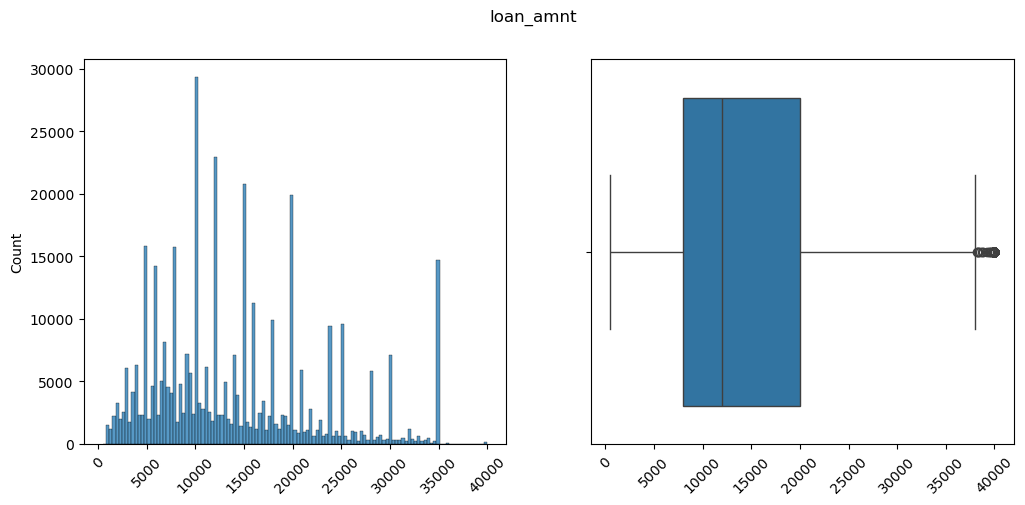

In [14]:
outliers(loantap['loan_amnt'])

The distribution of `loan_amnt` shows minor right-skewness and a small number of mild outliers beyond the IQR threshold. 

Given that the number of outliers is negligible (0.05%) and the maximum value is only marginally above the permissible range, these values are considered valid and representative of high-value loan requests. 

=> No outlier treatment is necessary.

**`int_rate`**

Name: int_rate
Number of missing values = 0 (0.0%)
Permissible range for outliers from IQR: [1.49, 25.49]
Number of outliers = 3777 (0.9537%)
Maximum value in the data = 30.99
Skewness: 0.4207
Kurtosis: -0.1439


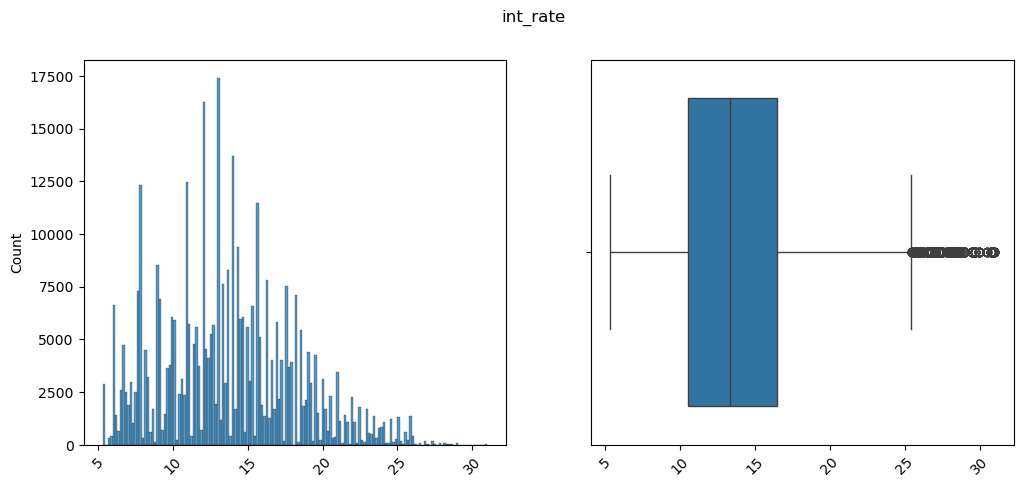

In [15]:
outliers(loantap['int_rate'])

The `int_rate` feature shows a nearly normal distribution with mild right skewness and a moderate number of outliers (0.95%). The maximum interest rate observed (30.99%) slightly exceeds the upper IQR bound but remains within reasonable limits for subprime or high-risk loans.

Given that the outliers constitute less than 1% of the dataset and may represent high-risk borrower segments, they are retained as potentially valuable indicators of credit risk. 

=> No outlier treatment is applied here as well.

**`installment`**

Name: installment
Number of missing values = 0 (0.0%)
Permissible range for outliers from IQR: [0, 1042.755]
Number of outliers = 11250 (2.8407%)
Maximum value in the data = 1533.81
Skewness: 0.9836
Kurtosis: 0.7838


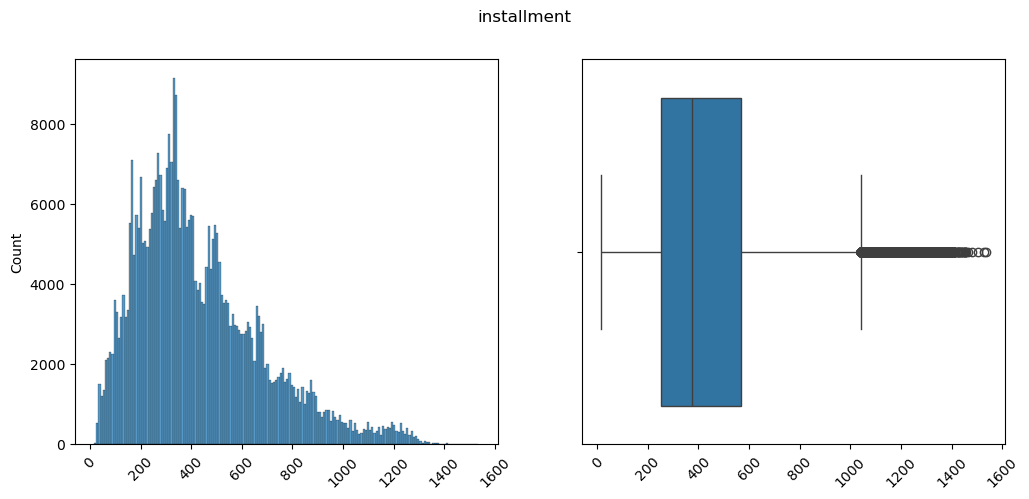

In [16]:
outliers(loantap['installment'])

The `installment` feature exhibits moderate right skewness and a slightly heavy-tailed distribution. Approximately 2.84% of observations exceed the upper IQR threshold. However, given the natural correlation between `installment`, `loan_amnt`, and `int_rate`, higher installment values are expected for larger or higher-interest loans.

These outliers are therefore considered valid high-liability borrowers rather than data anomalies. 

=> No outlier treatment is applied.

**`annual_inc`**

Name: annual_inc
Number of missing values = 0 (0.0%)
Permissible range for outliers from IQR: [0, 157500.0]
Number of outliers = 16700 (4.2169%)
Maximum value in the data = 8706582.0
Skewness: 41.0427
Kurtosis: 4238.5506


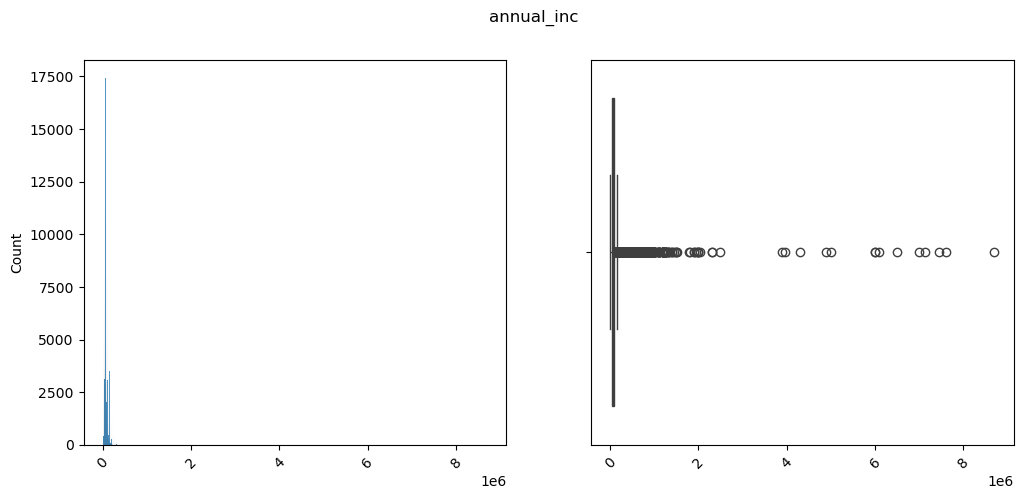

In [17]:
outliers(loantap['annual_inc'])

The `annual_inc` feature shows extreme right skewness and heavy kurtosis, indicating the presence of a long tail of high-income borrowers. While these outliers represent a moderate portion of the dataset (4.22%), the extreme values are several orders of magnitude higher than the upper IQR threshold and could disproportionately influence model coefficients in logistic regression.

Such extreme variability in income may not reflect linear behavior in credit risk and could introduce instability in the model.

=> Log transformation is applied, to reduce skewness and compress the dynamic range. This preserves the ranking and relative differences between incomes while minimizing the effect of extreme values.

=> No capping or removal is necessary, as the high-income borrowers may still represent valid segments.

In [18]:
loantap['annual_inc_log'] = np.log1p(loantap['annual_inc'])

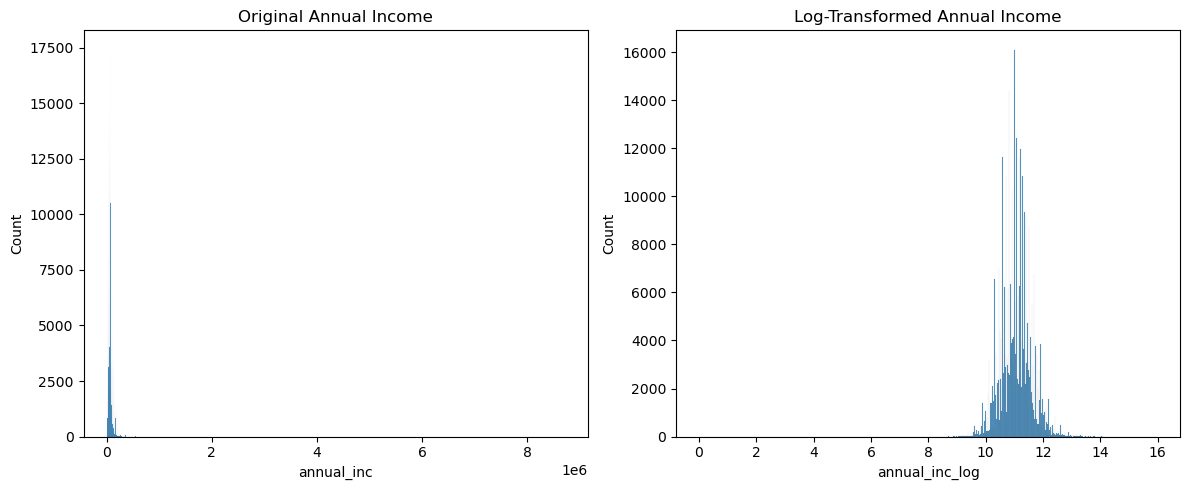

In [19]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(loantap['annual_inc'])
plt.title('Original Annual Income')

plt.subplot(1,2,2)
sns.histplot(loantap['annual_inc_log'])
plt.title('Log-Transformed Annual Income')

plt.tight_layout()
plt.show()

As we can see, after applying transformation, the `annual_inc_log` feature is normalized. We can drop the original `annual_inc` feature now.

In [20]:
loantap.drop(columns=['annual_inc'], inplace=True)

Let us check the distribution of `annual_inc_log`.

Name: annual_inc_log
Number of missing values = 0 (0.0%)
Permissible range for outliers from IQR: [9.6747, 12.4473]
Number of outliers = 5446 (1.3751%)
Maximum value in the data = 15.979589964163583
Skewness: 0.1662
Kurtosis: 1.5888


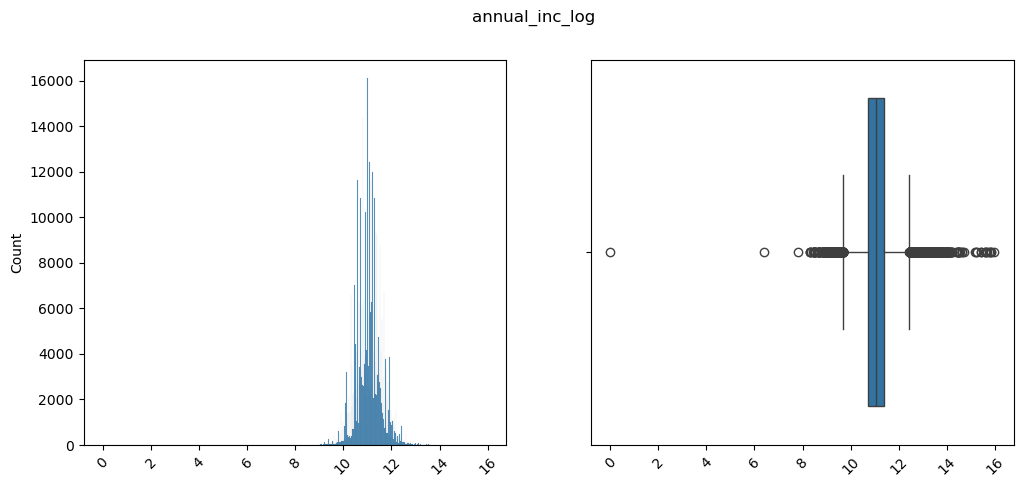

In [21]:
outliers(loantap['annual_inc_log'])

**`dti`**

Name: dti
Number of missing values = 0 (0.0%)
Permissible range for outliers from IQR: [0, 40.53]
Number of outliers = 275 (0.0694%)
Maximum value in the data = 9999.0
Skewness: 431.0512
Kurtosis: 237923.6765


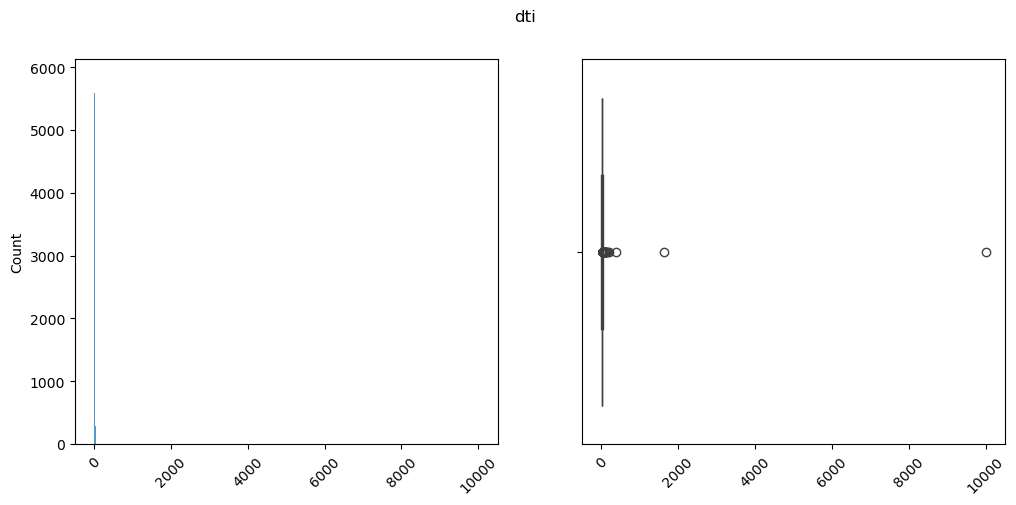

In [22]:
outliers(loantap['dti'])

The `dti` feature is intended to reflect the borrower’s monthly debt obligations as a percentage of their income, which is a key risk metric in credit underwriting. While 99.93% of values fall within a reasonable range, a small number of extreme outliers (e.g., values up to 9,999) significantly skew the distribution and inflate its kurtosis.

Such outlier values are likely the result of data entry issues or system errors (e.g., default placeholder values or incorrect scale). In practice, a DTI above 100% is typically unsustainable and would not represent a viable loan applicant.

=> Capping of outliers at dti = 100 is required.

In [23]:
loantap['dti'] = loantap['dti'].clip(upper=100)

Name: dti
Number of missing values = 0 (0.0%)
Permissible range for outliers from IQR: [0, 40.53]
Number of outliers = 275 (0.0694%)
Maximum value in the data = 100.0
Skewness: 0.2822
Kurtosis: -0.1627


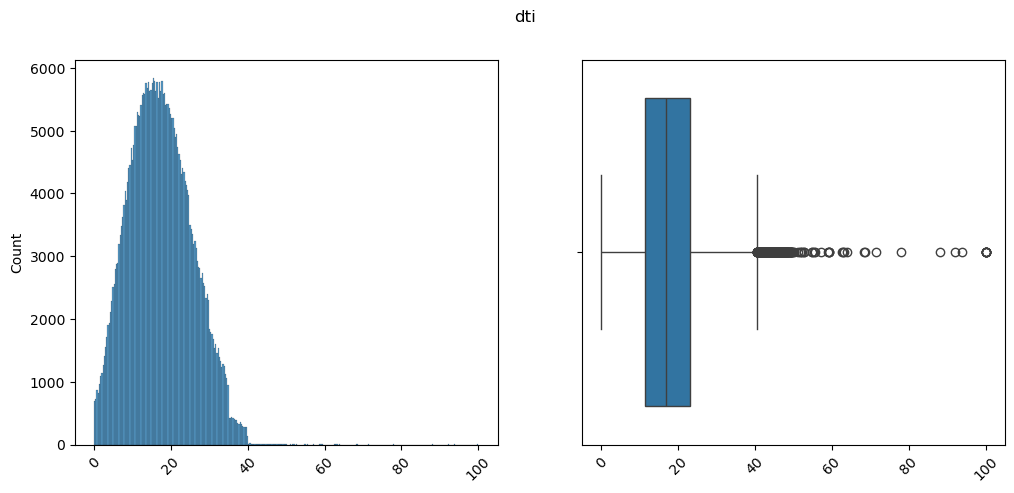

In [24]:
outliers(loantap['dti'])

**`open_acc`**

Name: open_acc
Number of missing values = 0 (0.0%)
Permissible range for outliers from IQR: [0, 23.0]
Number of outliers = 10307 (2.6026%)
Maximum value in the data = 90.0
Skewness: 1.213
Kurtosis: 2.9669


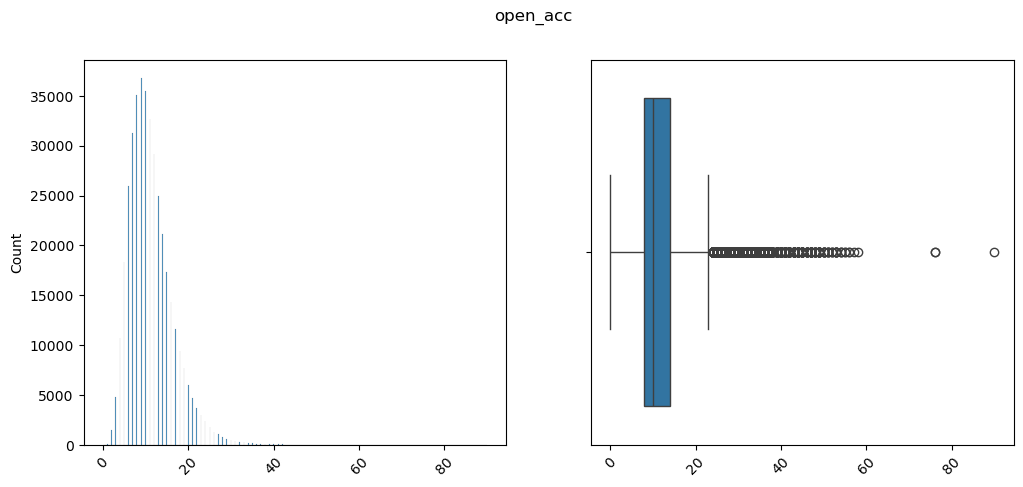

In [25]:
outliers(loantap['open_acc'])

The `open_acc` feature captures the number of currently active credit lines per borrower. While the IQR method flags 2.6% of the values as outliers above 23 accounts, these are not implausible in a real-world credit environment, especially for financially active or high-credit-score individuals.

The observed maximum value of 90, although relatively high, may still represent a valid customer (e.g., someone with multiple credit cards, mortgages, and installment loans). Additionally, the moderate skew and non-extreme kurtosis suggest a manageable distribution for modeling.

=> No outlier treatment is required.

**`pub_rec`**

Name: pub_rec
Number of missing values = 0 (0.0%)
Permissible range for outliers from IQR: [0, 0.0]
Number of outliers = 57758 (14.5842%)
Maximum value in the data = 86.0
Skewness: 16.5766
Kurtosis: 1867.4666


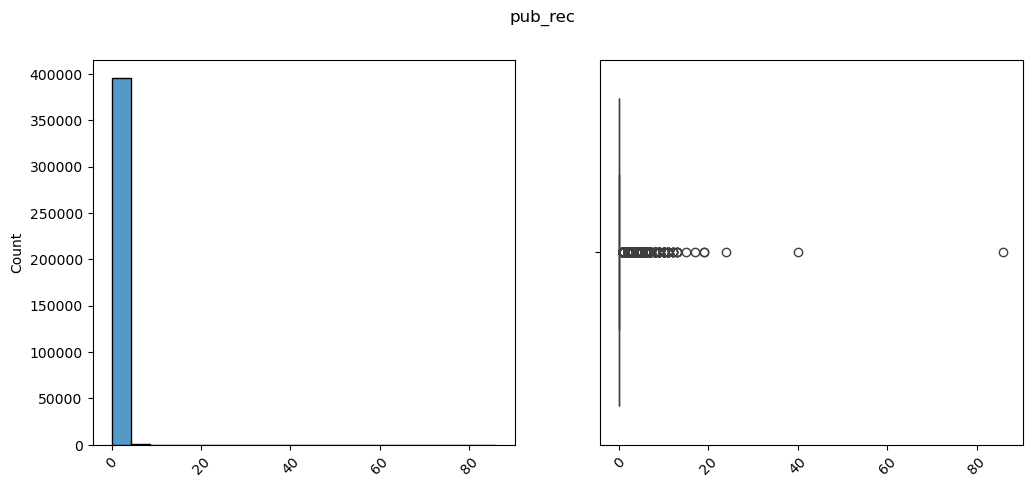

In [26]:
outliers(loantap['pub_rec'])

In [27]:
loantap['pub_rec'].value_counts()/loantap.shape[0]*100

pub_rec
0.0     85.415751
1.0     12.559402
2.0      1.382724
3.0      0.384062
4.0      0.133071
5.0      0.059844
6.0      0.030806
7.0      0.014140
8.0      0.008585
9.0      0.003030
10.0     0.002778
11.0     0.002020
13.0     0.001010
12.0     0.001010
19.0     0.000505
40.0     0.000253
17.0     0.000253
86.0     0.000253
24.0     0.000253
15.0     0.000253
Name: count, dtype: float64

The `pub_rec` feature represents the number of negative public credit records (e.g., bankruptcies, tax liens, judgments). The data is highly skewed, with 85.42% of records having a value of 0 and a long tail of increasing severity.

Despite the IQR method labeling all values above 0 as outliers, these are semantically meaningful rather than statistical anomalies. Higher `pub_rec` values, although rare, directly reflect elevated credit risk and are therefore important for underwriting.

=> It is best to engineer another feature called `pub_rec_flag`, with **non-zero values = 1** and **zero values = 0**.

In [28]:
loantap['pub_rec_flag'] = loantap['pub_rec'].apply(lambda x: 0 if x==0 else 1)

We can remove the feature `pub_rec` now.

In [29]:
loantap.drop(columns='pub_rec', inplace=True)

**`revol_bal`**

Name: revol_bal
Number of missing values = 0 (0.0%)
Permissible range for outliers from IQR: [0, 40012.5]
Number of outliers = 21259 (5.368%)
Maximum value in the data = 1743266.0
Skewness: 11.7275
Kurtosis: 384.2211


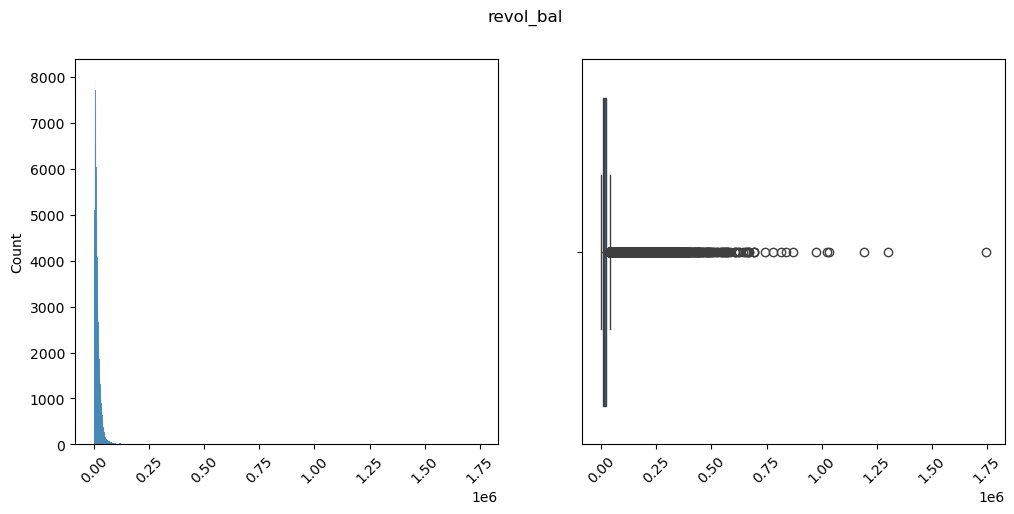

In [30]:
outliers(loantap['revol_bal'])

`revol_bal` reflects the total outstanding balances on revolving credit accounts (e.g., credit cards). The feature exhibits extreme right skewness and heavy kurtosis, driven by a small fraction of borrowers with very large balances.

Though only 5.37% of records lie beyond the IQR threshold, the maximum value of over 1.7 million is several orders of magnitude higher than the typical range. Such extremes are unlikely to follow the same risk dynamics and may disproportionately affect model coefficients, especially in logistic regression.

At the same time, revolving balance is a core credit indicator, and high balances often correspond with higher credit utilization and potential repayment risk, making this a critical feature to retain.

=> We apply log transformation. No capping is required in this case, since log transformation will dampen the outliers.

In [31]:
loantap['revol_bal_log'] = np.log1p(loantap['revol_bal'])

Name: revol_bal_log
Number of missing values = 0 (0.0%)
Permissible range for outliers from IQR: [6.9331, 11.6551]
Number of outliers = 14451 (3.649%)
Maximum value in the data = 14.371271496935893
Skewness: -2.8519
Kurtosis: 17.6508


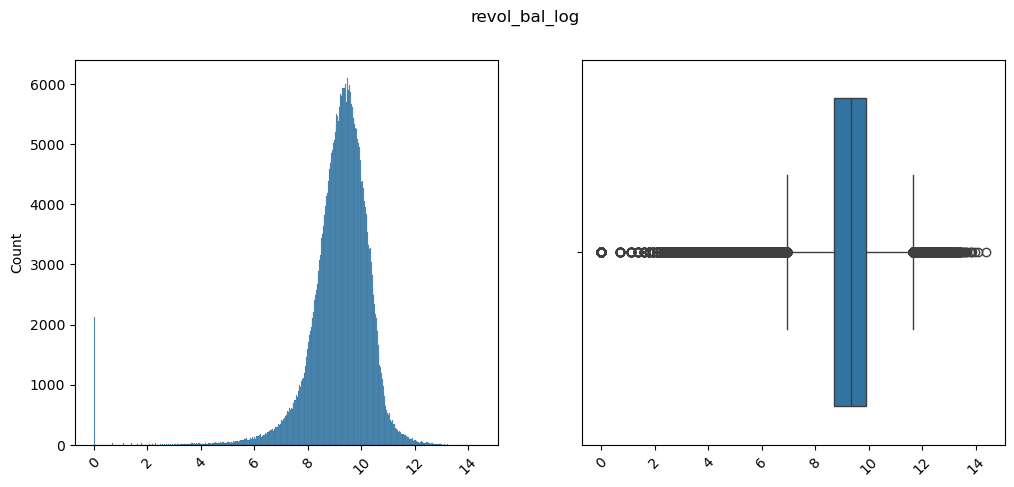

In [32]:
outliers(loantap['revol_bal_log'])

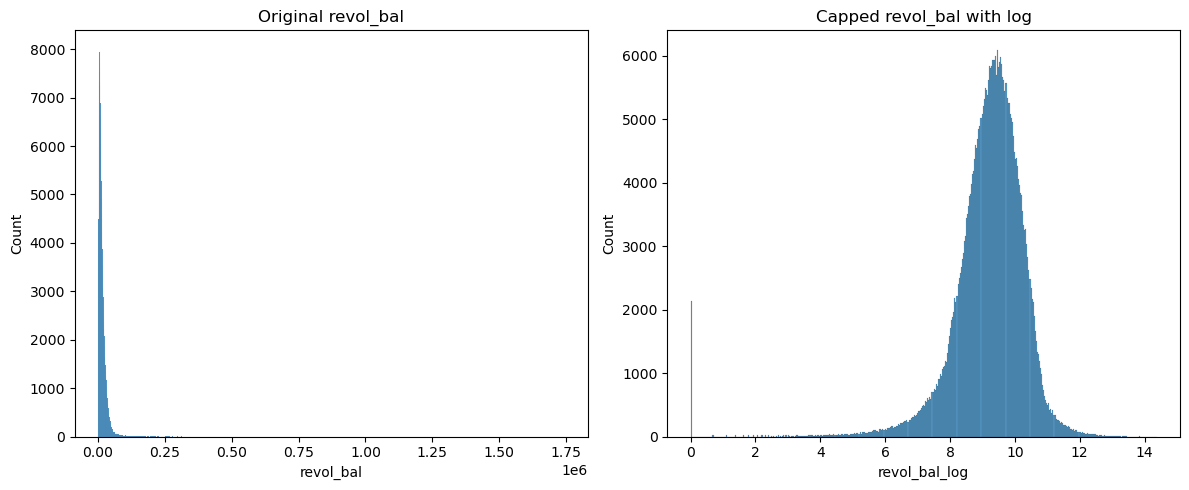

In [33]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(loantap['revol_bal'])
plt.title('Original revol_bal')

plt.subplot(1,2,2)
sns.histplot(loantap['revol_bal_log'])
plt.title('Capped revol_bal with log')

plt.tight_layout()
plt.show()

Now we can remove the original `revol_bal` feature.

In [34]:
loantap.drop(columns=['revol_bal'], inplace=True)

**`revol_util`**

Name: revol_util
Number of missing values = 276 (0.0007%)
Permissible range for outliers from IQR: [0, 128.55]
Number of outliers = 12 (0.003%)
Maximum value in the data = 892.3
Skewness: -0.0718
Kurtosis: 2.7123


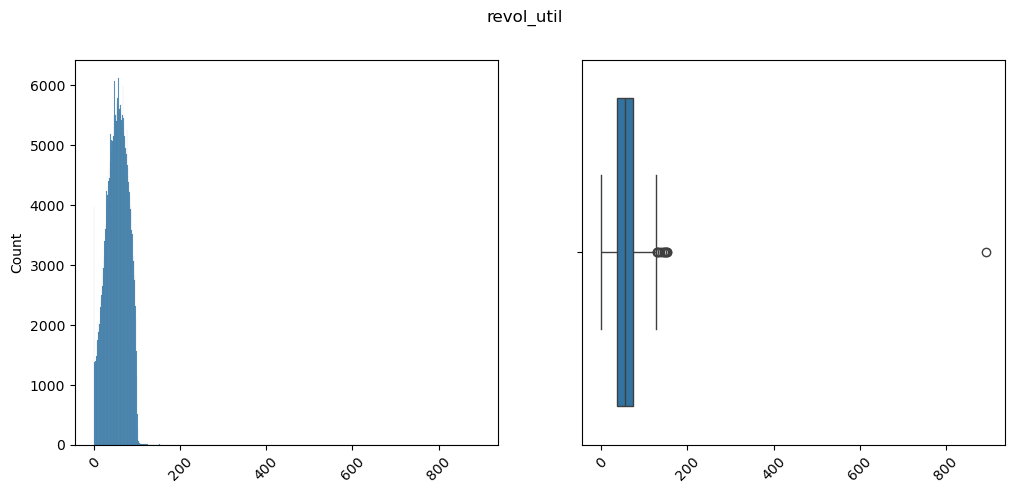

In [35]:
outliers(loantap['revol_util'])

The `revol_util` feature represents the percentage of available revolving credit (like credit cards) that a borrower is currently using. It's a key predictor of credit behavior. Higher values typically signal higher risk.

The distribution is nearly symmetrical, with very few outliers (12 records) above the upper IQR threshold of 128.55. The maximum value of 892.3%, however, is highly implausible, as utilization should logically range from 0% to 100% in most cases. Such extreme values likely result from data entry or calculation errors (e.g., missing denominators or undefined credit limits).

=> The values are capped at 100% and the missing values are filled with median value of the feature. 

In [36]:
loantap['revol_util'] = loantap['revol_util'].clip(upper=100)

In [37]:
loantap['revol_util'] = loantap['revol_util'].fillna(loantap['revol_util'].median())

**`total_acc`**

Name: total_acc
Number of missing values = 0 (0.0%)
Permissible range for outliers from IQR: [0, 54.5]
Number of outliers = 8499 (2.146%)
Maximum value in the data = 151.0
Skewness: 0.8643
Kurtosis: 1.2046


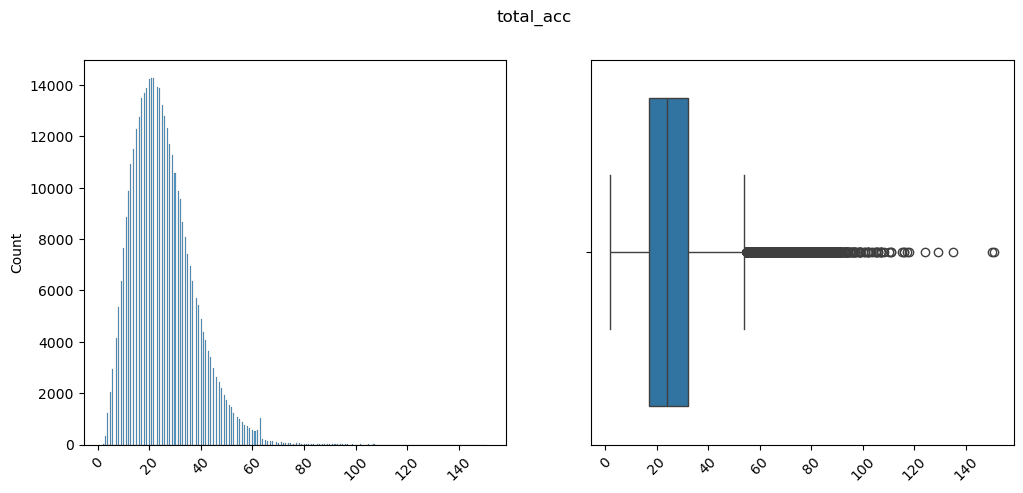

In [38]:
outliers(loantap['total_acc'])

The `total_acc` feature represents the total number of credit accounts a borrower has ever opened, including current and closed accounts. While 2.15% of the data exceeds the IQR threshold of 54.5, this is not statistically extreme and the distribution is manageable with only mild skewness.

High values (e.g., 151 accounts) may represent financially active or older borrowers with long credit histories. Since the tail is neither long nor heavy, these values are likely valid and informative rather than anomalous.

=> No outlier treatment is required.

**`mort_acc`**

Name: mort_acc
Number of missing values = 37795 (0.0954%)
Permissible range for outliers from IQR: [0, 7.5]
Number of outliers = 6843 (1.7279%)
Maximum value in the data = 34.0
Skewness: 1.6001
Kurtosis: 4.4772


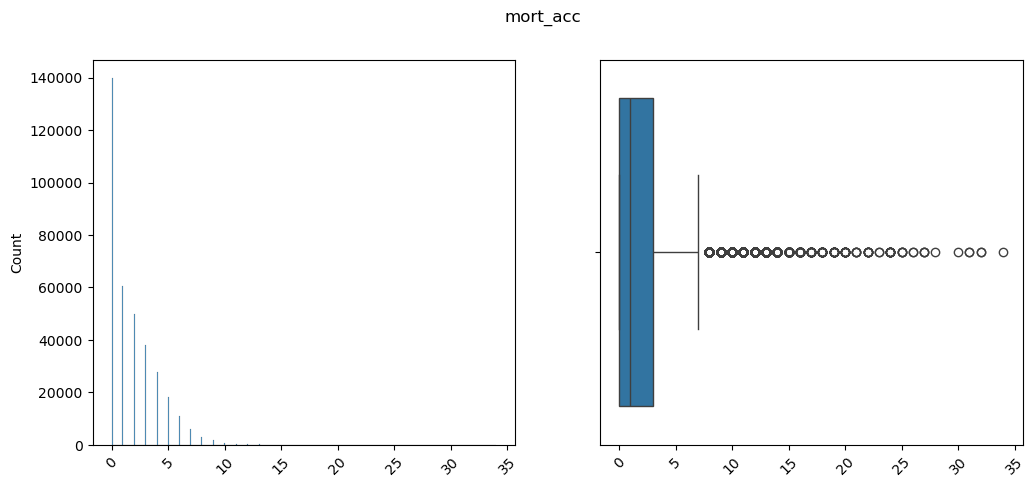

In [39]:
outliers(loantap['mort_acc'])

The `mort_acc` feature reflects the number of mortgage and home equity accounts a borrower has. While the IQR method flags about 1.7% of records as outliers, the observed high values are not necessarily implausible; especially for affluent borrowers with multiple properties or long credit histories. The moderate skewness and slightly heavy tails indicate that the distribution, while uneven, is not extreme.

However, the more significant issue is the 9.5% of records with missing values, which requires careful treatment to avoid information leakage or data loss.

=> No outlier treatment is needed. Median imputation is applied.

In [40]:
loantap['mort_acc'] = loantap['mort_acc'].fillna(loantap['mort_acc'].median())

We will also create a flag called `mort_acc_flag`, which will have 0 for mort_acc=0 and 1 otherwise.

In [41]:
loantap['mort_acc_flag'] = loantap['mort_acc'].apply(lambda x: 0 if x==0 else 1)

**`pub_rec_bankruptcies`**

Name: pub_rec_bankruptcies
Number of missing values = 535 (0.0014%)
Permissible range for outliers from IQR: [0, 0.0]
Number of outliers = 45115 (11.3918%)
Maximum value in the data = 8.0
Skewness: 3.4234
Kurtosis: 18.1042


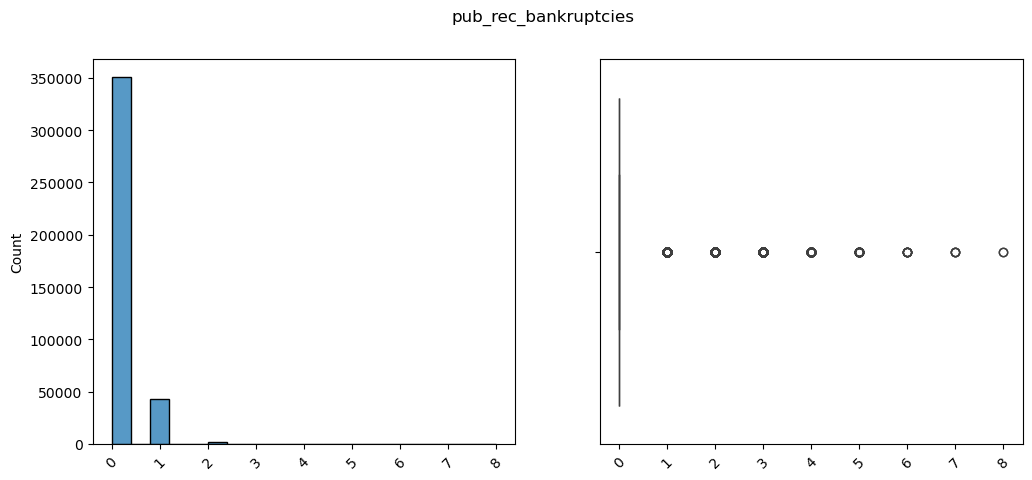

In [42]:
outliers(loantap['pub_rec_bankruptcies'])

This feature reflects the number of bankruptcies associated with a borrower, drawn from public records. While the IQR method labels all non-zero values as outliers, these outliers are semantically valid and highly informative, as bankruptcy history is a direct indicator of financial distress and is often a strong predictor of loan default.

Although the distribution is heavily right-skewed, this is expected, since most borrowers have zero bankruptcies, and higher values naturally indicate higher risk. The observed maximum of 8 is rare but not implausible.

=> No outlier treatment is applied. Since bankruptcies are relatively rare, and missing values are minimal (0.14%), they are imputed with 0, assuming absence unless otherwise recorded.

In [43]:
loantap['pub_rec_bankruptcies'] = loantap['pub_rec_bankruptcies'].fillna(0)

We will also create a flag called `pub_rec_bankruptcies_flag`, which will have 0 for pub_rec_bankruptcies=0 and 1 otherwise.

In [44]:
loantap['pub_rec_bankruptcies_flag'] = loantap['pub_rec_bankruptcies'].apply(lambda x: 0 if x==0 else 1)

#### 1.3.2 Categorical Features

In [45]:
cat = loantap.select_dtypes(include='object')

In [46]:
cat.shape[1]

15

In [47]:
cat.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [48]:
def describe(series):
    print(f'Name: {series.name}')
    print(f'Number of unique values = {series.nunique()}')
    print(f'Number of missing values = {series.isna().sum()} ({round(series.isna().sum()/len(series)*100,4)}%)')
    print('\nVALUE COUNTS:')
    print(series.value_counts())

**`loan_status`**

This is the target variable.

In [49]:
describe(loantap['loan_status'])

Name: loan_status
Number of unique values = 2
Number of missing values = 0 (0.0%)

VALUE COUNTS:
loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64


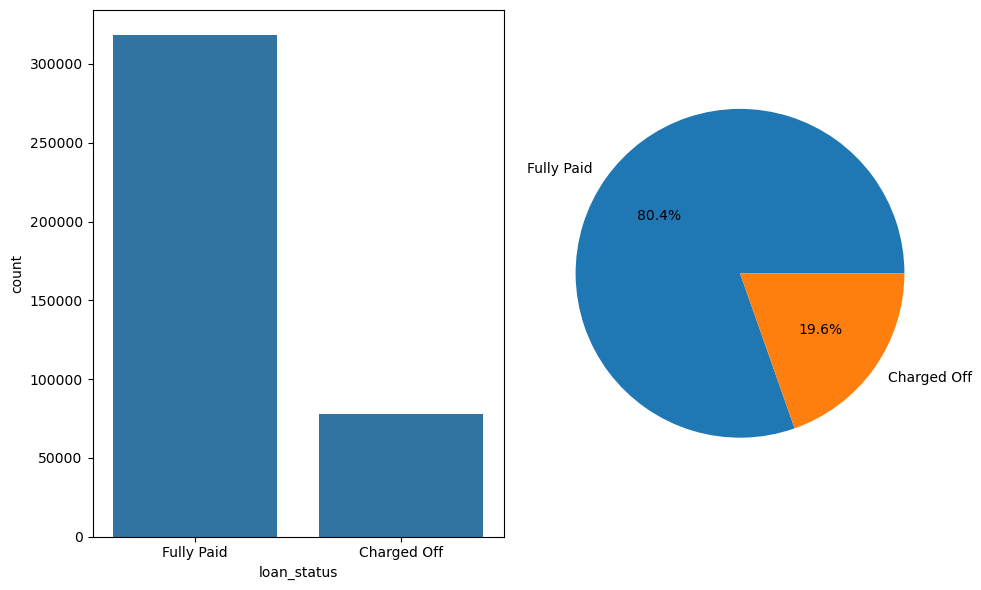

In [50]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(data=loantap, x='loan_status')

plt.subplot(1,2,2)
plt.pie(loantap['loan_status'].value_counts(), labels=loantap['loan_status'].value_counts().index, autopct='%1.1f%%')

plt.tight_layout()
plt.show()

The loan_status field serves as the binary target variable for modeling loan repayment outcomes. It is complete (no missing values) and represents a moderately imbalanced binary classification problem (~80/20 split), which is common in credit datasets.

To align with standard practice and ensure intuitive coefficient interpretation in logistic regression, we define the positive class (1) as:

**Fully_paid = 0**

**Charged_off = 1**

In [51]:
loantap['loan_status_fully_paid'] = loantap['loan_status'].map({'Fully Paid':0, 'Charged Off':1})
loantap.drop(columns='loan_status', inplace=True)

**`term`**

In [52]:
describe(loantap['term'])

Name: term
Number of unique values = 2
Number of missing values = 0 (0.0%)

VALUE COUNTS:
term
36 months    302005
60 months     94025
Name: count, dtype: int64


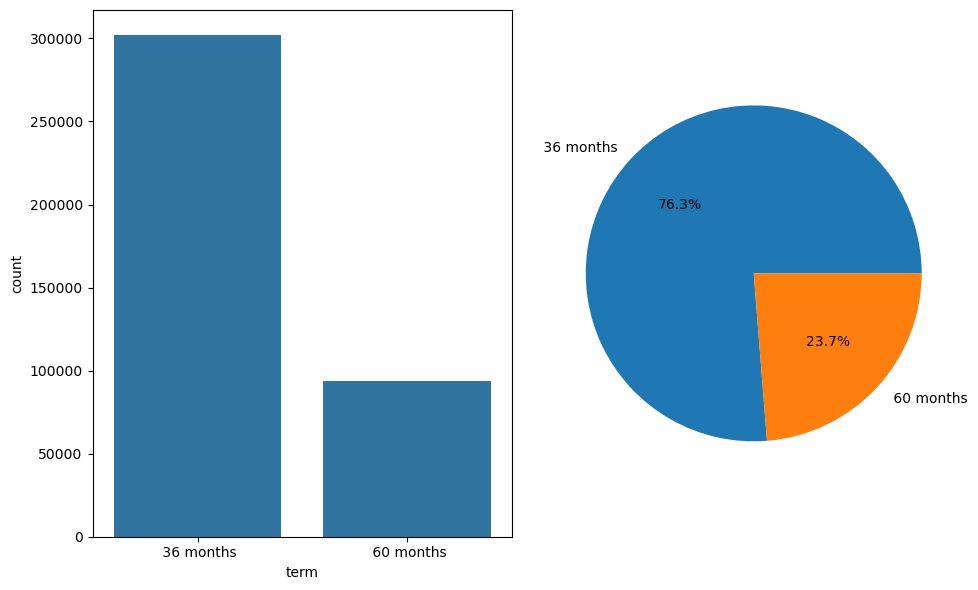

In [53]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(data=loantap, x='term')

plt.subplot(1,2,2)
plt.pie(loantap['term'].value_counts(), labels=loantap['term'].value_counts().index, autopct='%1.1f%%')

plt.tight_layout()
plt.show()

The `term` feature indicates the repayment duration of the loan, either 36 months or 60 months. It is complete and categorical with two distinct values. Longer-term loans often carry more risk, as they imply higher total interest and a longer exposure window.

Because it is a binary categorical feature, it should be converted into a numerical dummy variable for logistic regression.

In [54]:
loantap['term_60_months'] = pd.get_dummies(loantap['term'], drop_first=True, dtype=int)
loantap.drop(columns='term', inplace=True)

**`grade`** and **`sub_grade`**

In [55]:
describe(loantap['grade'])

Name: grade
Number of unique values = 7
Number of missing values = 0 (0.0%)

VALUE COUNTS:
grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64


In [56]:
describe(loantap['sub_grade'])

Name: sub_grade
Number of unique values = 35
Number of missing values = 0 (0.0%)

VALUE COUNTS:
sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64


Let us check these two columns in detail.

In [57]:
loantap[['grade','sub_grade']]

grade sub_grade
0          B        B4
1          B        B5
2          B        B3
3          A        A2
4          C        C5
...      ...       ...
396025     B        B4
396026     C        C1
396027     B        B1
396028     C        C2
396029     C        C2

[396030 rows x 2 columns]

We can see that the feature `sub_grade` already contains the information of the feature `grade`. Let us verify this for all rows.

In [58]:
np.all(loantap['grade'] == loantap['sub_grade'].str[0])

True

Thus, the feature `grade` is redundant and hence can be removed.

In [59]:
loantap.drop(columns='grade', inplace=True)

Let us explore `sub_grade` in detail.

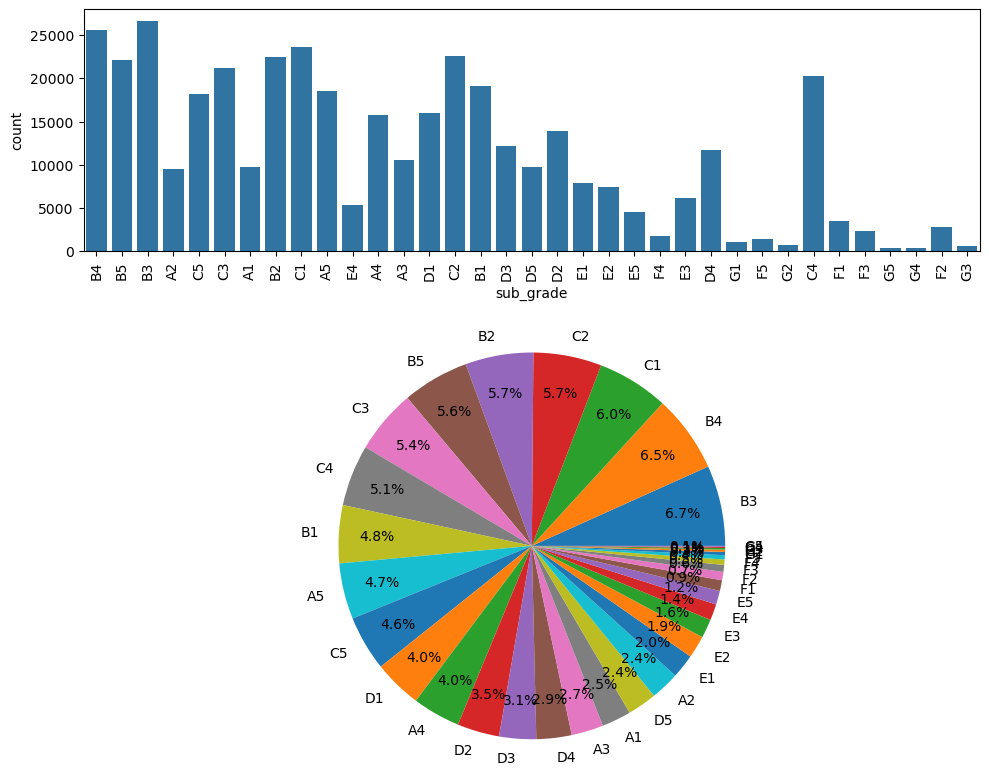

In [60]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.countplot(data=loantap, x='sub_grade')
plt.xticks(rotation=90)

plt.subplot(2,1,2)
plt.pie(loantap['sub_grade'].value_counts(), labels=loantap['sub_grade'].value_counts().index, autopct='%1.1f%%', radius=2, pctdistance=0.8)

plt.tight_layout()
plt.show()

The `sub_grade` feature is a high-cardinality, ordinal variable that reflects borrower credit quality. It is transformed using ordinal encoding (from A1 = best (1) to G5 = worst (35)) to preserve ranking while keeping the feature interpretable and efficient for logistic regression.

In [61]:
subgrade_order = [
    'A1', 'A2', 'A3', 'A4', 'A5',
    'B1', 'B2', 'B3', 'B4', 'B5',
    'C1', 'C2', 'C3', 'C4', 'C5',
    'D1', 'D2', 'D3', 'D4', 'D5',
    'E1', 'E2', 'E3', 'E4', 'E5',
    'F1', 'F2', 'F3', 'F4', 'F5',
    'G1', 'G2', 'G3', 'G4', 'G5'
]

subgrade_map = {grade: i + 1 for i, grade in enumerate(subgrade_order)}
loantap['sub_grade_encoded'] = loantap['sub_grade'].map(subgrade_map)
loantap.drop(columns='sub_grade', inplace=True)

**`emp_title`**

In [62]:
describe(loantap['emp_title'])

Name: emp_title
Number of unique values = 173105
Number of missing values = 22927 (5.7892%)

VALUE COUNTS:
emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64


The `emp_title` field is a free-text field entered by borrowers to describe their job titles. It has extremely high cardinality (173k unique values) with a very long tail of rare or one-off entries, making it noisy and hard to encode directly for logistic regression.

=> It is best to drop this feature.

In [63]:
loantap.drop(columns='emp_title', inplace=True)

**`title`** and **`purpose`**

In [64]:
describe(loantap['title'])

Name: title
Number of unique values = 48816
Number of missing values = 1756 (0.4434%)

VALUE COUNTS:
title
Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: count, Length: 48816, dtype: int64


In [65]:
describe(loantap['purpose'])

Name: purpose
Number of unique values = 14
Number of missing values = 0 (0.0%)

VALUE COUNTS:
purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64


Let us check these two features in detail.

In [66]:
loantap[['title','purpose']]

title             purpose
0                      Vacation            vacation
1            Debt consolidation  debt_consolidation
2       Credit card refinancing         credit_card
3       Credit card refinancing         credit_card
4         Credit Card Refinance         credit_card
...                         ...                 ...
396025       Debt consolidation  debt_consolidation
396026       Debt consolidation  debt_consolidation
396027     pay off credit cards  debt_consolidation
396028            Loanforpayoff  debt_consolidation
396029        Toxic Debt Payoff  debt_consolidation

[396030 rows x 2 columns]

We can see that the features `title` and `purpose` are very similar. However, `title` field suffers from high cardinality and inconsistent formatting. It is best to drop this feature, since `purpose` captures the important information with less cardinality.

In [67]:
loantap.drop(columns='title', inplace=True)

Let us explore the feature `purpose` in detail.

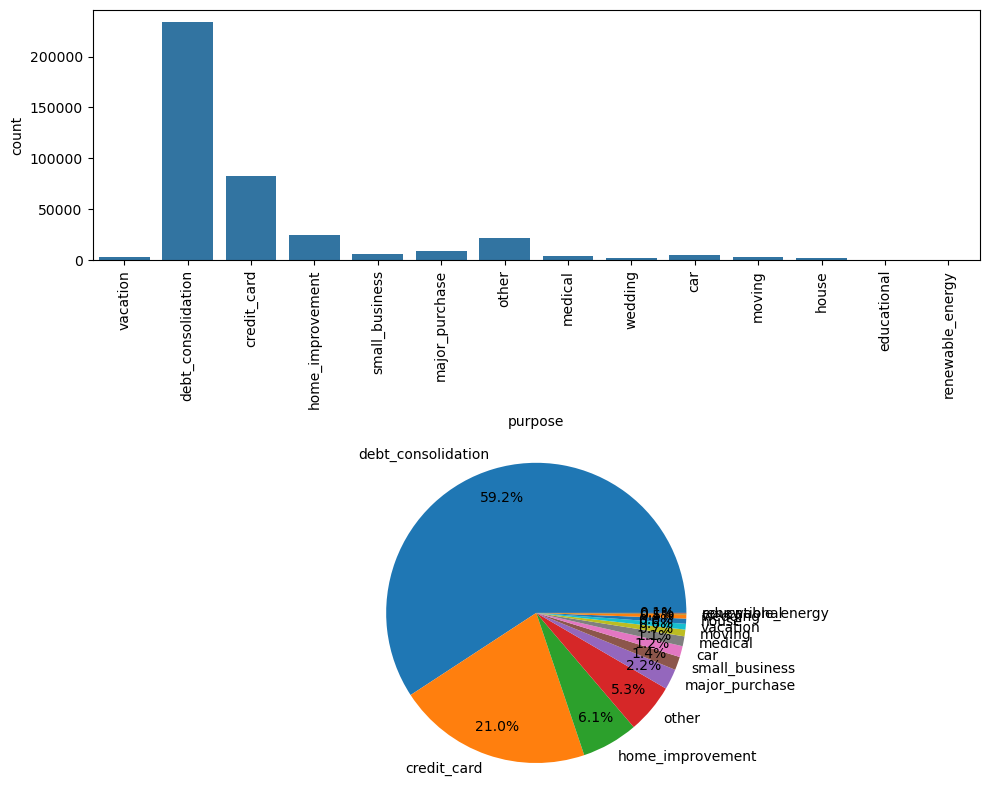

In [68]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.countplot(data=loantap, x='purpose')
plt.xticks(rotation=90)

plt.subplot(2,1,2)
plt.pie(loantap['purpose'].value_counts(), labels=loantap['purpose'].value_counts().index, autopct='%1.1f%%', radius=1.5, pctdistance=0.8)

plt.tight_layout()
plt.show()

The `purpose` field is a clean, pre-categorized version of the borrower-provided title. It reflects the intended use of the loan in one of 14 defined categories. Unlike `title`, which is free-text, purpose is standardized, lower cardinality, and well-suited for direct use in modeling.

For better interpretability in Logistic Regression, one-hot encoding will be applied on this feature. 

In [69]:
loantap = pd.get_dummies(loantap, columns=['purpose'], prefix='purpose', drop_first=True, dtype=int)

**`emp_length`**

In [70]:
describe(loantap['emp_length'])

Name: emp_length
Number of unique values = 11
Number of missing values = 18301 (4.6211%)

VALUE COUNTS:
emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64


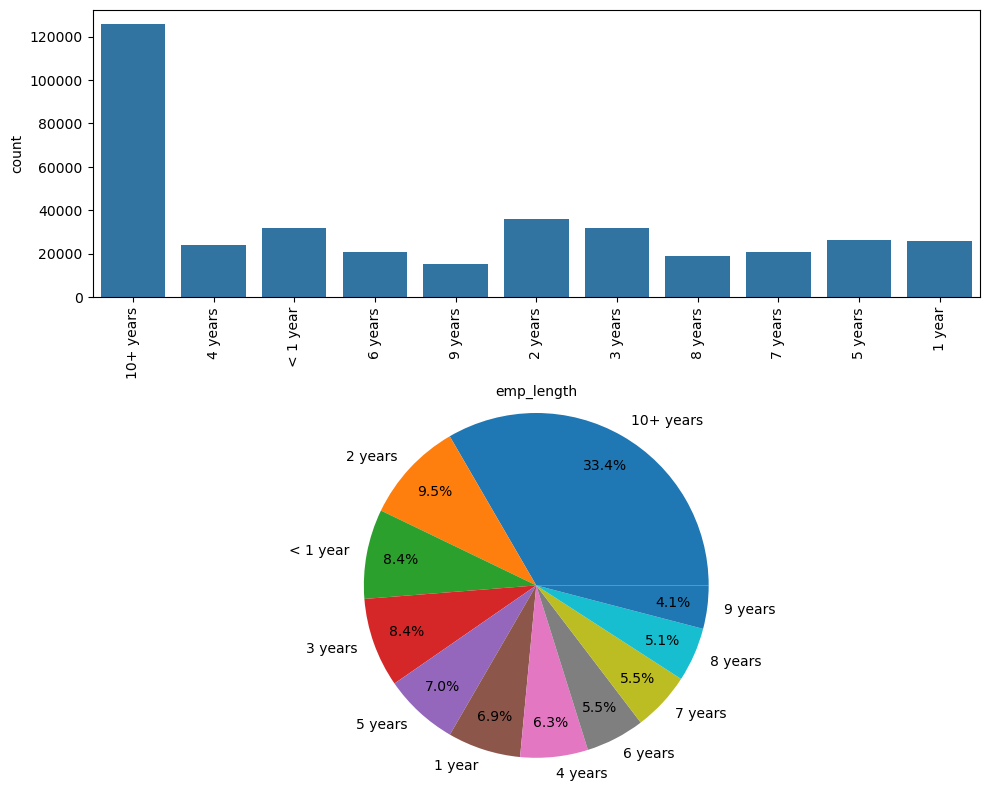

In [71]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.countplot(data=loantap, x='emp_length')
plt.xticks(rotation=90)

plt.subplot(2,1,2)
plt.pie(loantap['emp_length'].value_counts(), labels=loantap['emp_length'].value_counts().index, autopct='%1.1f%%', radius=1.5, pctdistance=0.8)

plt.tight_layout()
plt.show()

`emp_length` captures the borrower’s stated length of employment and is a key creditworthiness indicator. It is ordinal (i.e., ordered from less experience to more), making it a valuable input for logistic regression when properly encoded.

Although 4.6% of records are missing, this is a relatively small proportion. First, the categoricals will be converted to numeric order with 1 year = 1 to 10+ years = 10. Then, the missing values are safely imputed with median value.

In [72]:
emp_length_map = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

loantap['emp_length_encoded'] = loantap['emp_length'].map(emp_length_map)

In [73]:
loantap['emp_length_encoded'] = loantap['emp_length_encoded'].fillna(loantap['emp_length_encoded'].median())

Now we can drop the original `emp_length` feature.

In [74]:
loantap.drop(columns='emp_length', inplace=True)

**`home_ownership`**

In [75]:
describe(loantap['home_ownership'])

Name: home_ownership
Number of unique values = 6
Number of missing values = 0 (0.0%)

VALUE COUNTS:
home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64


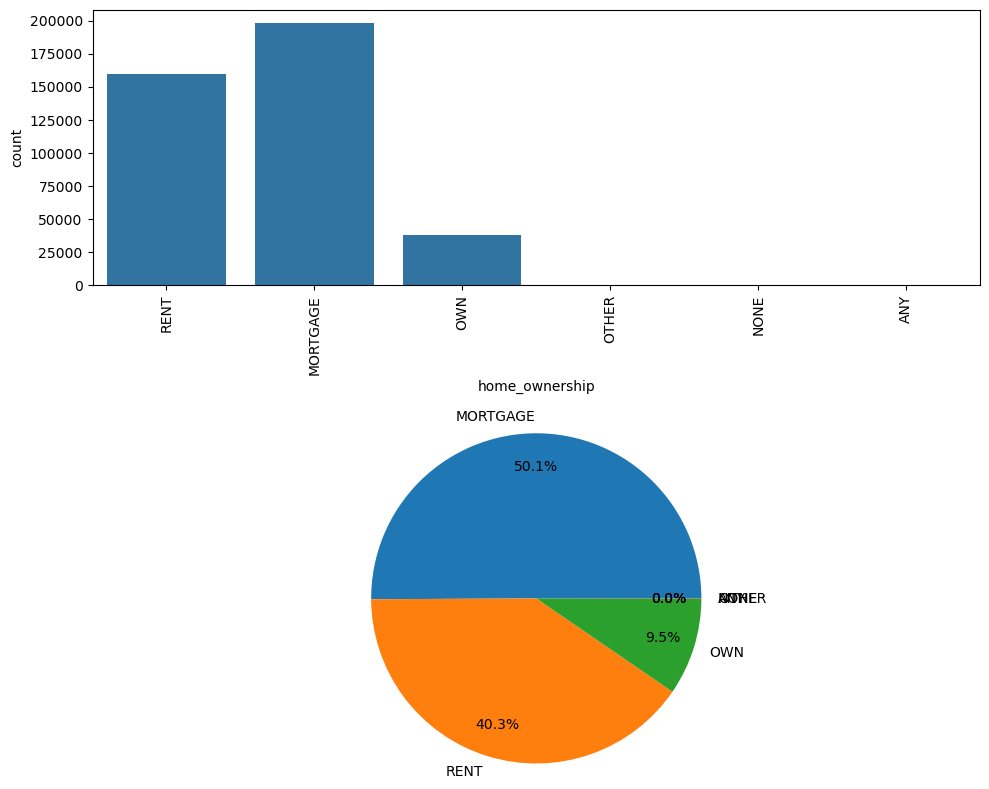

In [76]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.countplot(data=loantap, x='home_ownership')
plt.xticks(rotation=90)

plt.subplot(2,1,2)
plt.pie(loantap['home_ownership'].value_counts(), labels=loantap['home_ownership'].value_counts().index, autopct='%1.1f%%', radius=1.5, pctdistance=0.8)

plt.tight_layout()
plt.show()

The `home_ownership` feature describes the borrower’s current housing arrangement and is often used as a proxy for financial stability. The majority of records fall into three well-understood categories: MORTGAGE, RENT, and OWN.

However, the remaining categories (OTHER, NONE, ANY) are extremely rare. Hence they are grouped into the same category 'OTHER'. After that, the feature is one-hot encoded. 

In [77]:
loantap['home_ownership'] = loantap['home_ownership'].replace({'NONE': 'OTHER', 'ANY': 'OTHER'})

In [78]:
loantap = pd.get_dummies(loantap, columns=['home_ownership'], prefix='home', drop_first=True, dtype=int)

**`verification_status`**

In [79]:
describe(loantap['verification_status'])

Name: verification_status
Number of unique values = 3
Number of missing values = 0 (0.0%)

VALUE COUNTS:
verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64


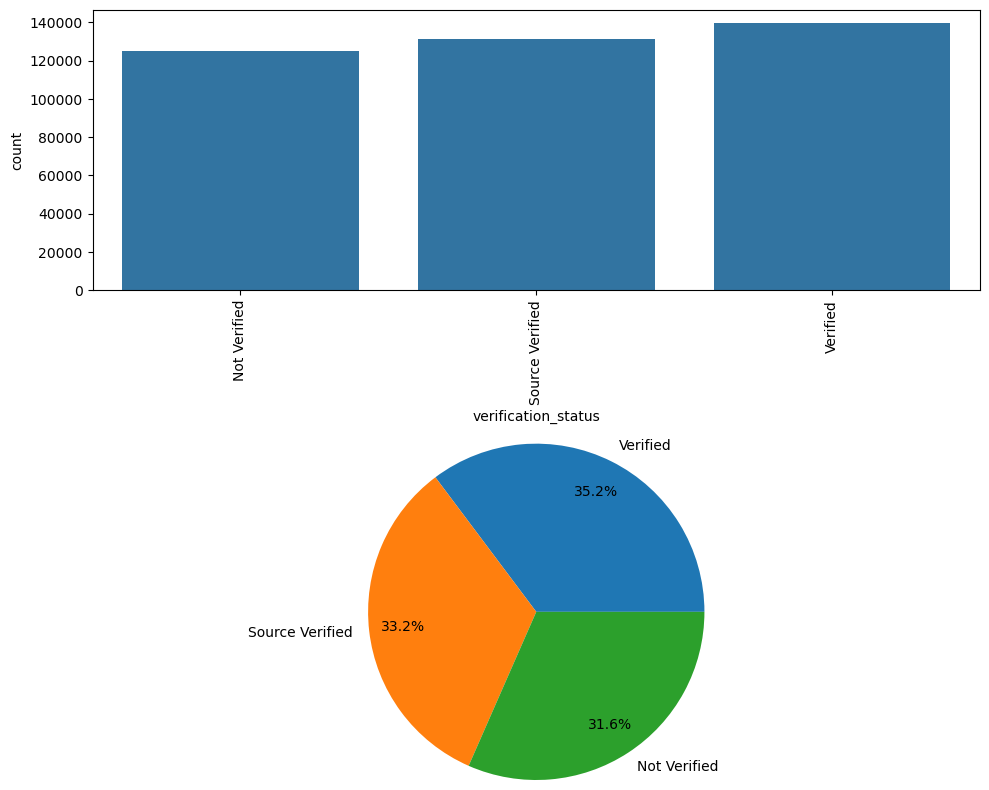

In [80]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.countplot(data=loantap, x='verification_status')
plt.xticks(rotation=90)

plt.subplot(2,1,2)
plt.pie(loantap['verification_status'].value_counts(), labels=loantap['verification_status'].value_counts().index, autopct='%1.1f%%', radius=1.5, pctdistance=0.8)

plt.tight_layout()
plt.show()

The `verification_status` feature indicates whether the borrower's income or employment was verified by the platform. All three categories are well-populated, and this feature can serve as an important signal for risk. Loans that were not verified may carry higher default probability.

One-hot encoding is applied on this feature.

In [81]:
loantap = pd.get_dummies(loantap, columns=['verification_status'], drop_first=True, dtype=int)

**`issue_d`** and **`earliest_cr_line`**

In [82]:
describe(loantap['issue_d'])

Name: issue_d
Number of unique values = 115
Number of missing values = 0 (0.0%)

VALUE COUNTS:
issue_d
Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
            ...  
Jul-2007       26
Sep-2008       25
Nov-2007       22
Sep-2007       15
Jun-2007        1
Name: count, Length: 115, dtype: int64


In [83]:
describe(loantap['earliest_cr_line'])

Name: earliest_cr_line
Number of unique values = 684
Number of missing values = 0 (0.0%)

VALUE COUNTS:
earliest_cr_line
Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: count, Length: 684, dtype: int64


The `issue_d` field records when the loan was issued. Whereas, the `earliest_cr_line` field reflects the date of borrower's oldest credit account.

We can create a new feature called `credit_history_length` from these two features. This is a powerful predictor of creditworthiness i.e. the longer the history, the lower the risk.

In [84]:
loantap['earliest_cr_line'] = pd.to_datetime(loantap['earliest_cr_line'], format='%b-%Y')
loantap['issue_d'] = pd.to_datetime(loantap['issue_d'], format='%b-%Y')
loantap['credit_history_length'] = (loantap['issue_d'] - loantap['earliest_cr_line']).dt.days//365

In [85]:
loantap = loantap.drop(columns=['issue_d', 'earliest_cr_line'])

Let us explore `credit_history_length` in detail.

Name: credit_history_length
Number of missing values = 0 (0.0%)
Permissible range for outliers from IQR: [0, 32.5]
Number of outliers = 10934 (2.7609%)
Maximum value in the data = 70
Skewness: 1.104
Kurtosis: 1.794


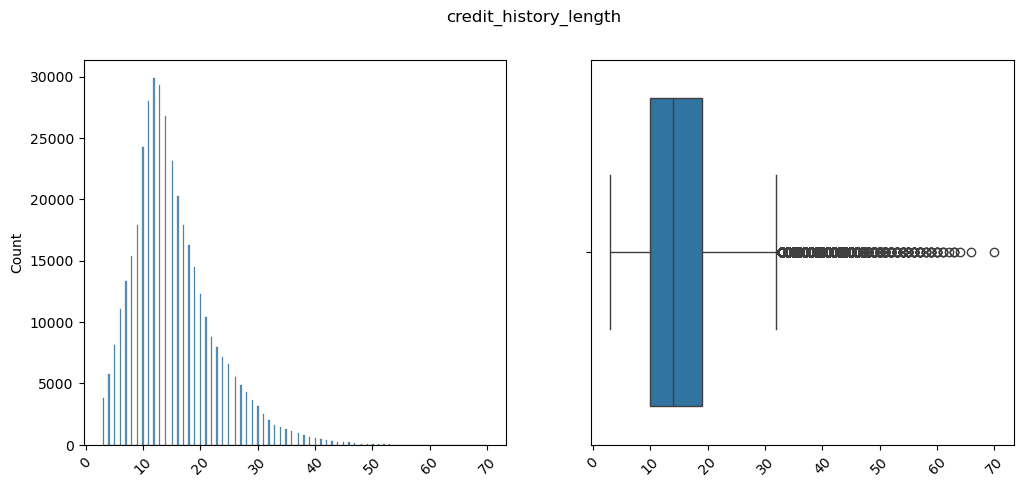

In [86]:
outliers(loantap['credit_history_length'])

`credit_history_length` is retained in its original numeric form without capping, as the outliers are plausible and represent a small fraction (2.76%) of the dataset. These outliers may carry meaningful signal related to low-risk, long-term borrowers.

**`initial_list_status`**

In [87]:
describe(loantap['initial_list_status'])

Name: initial_list_status
Number of unique values = 2
Number of missing values = 0 (0.0%)

VALUE COUNTS:
initial_list_status
f    238066
w    157964
Name: count, dtype: int64


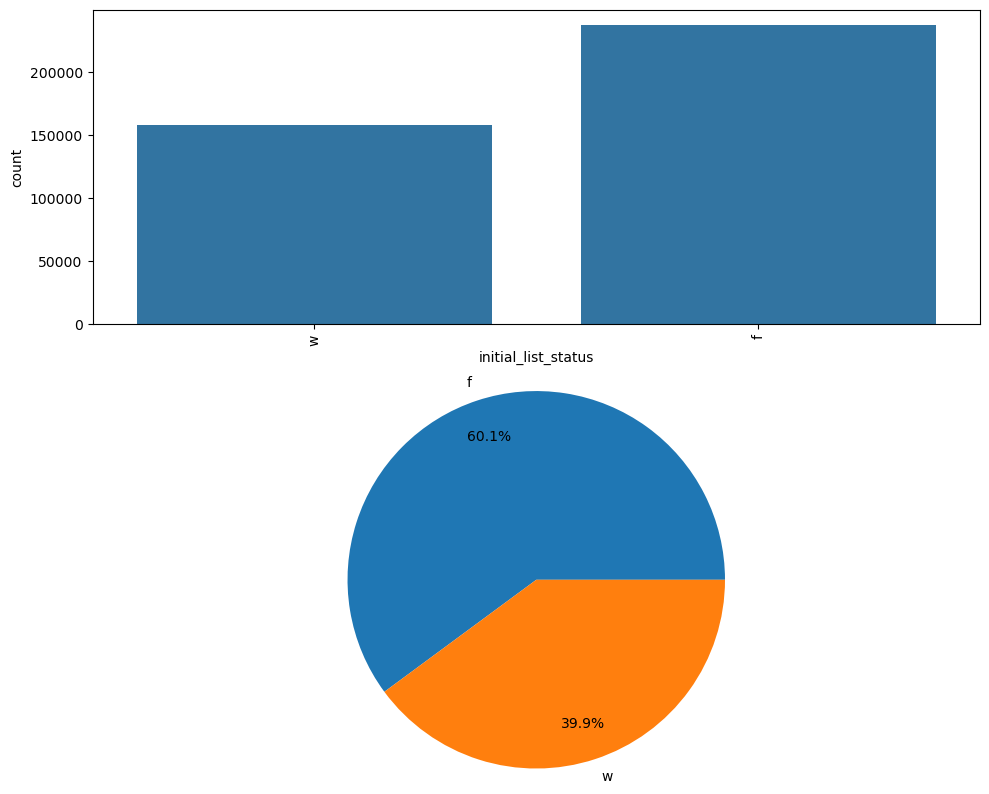

In [88]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.countplot(data=loantap, x='initial_list_status')
plt.xticks(rotation=90)

plt.subplot(2,1,2)
plt.pie(loantap['initial_list_status'].value_counts(), labels=loantap['initial_list_status'].value_counts().index, autopct='%1.1f%%', radius=1.5, pctdistance=0.8)

plt.tight_layout()
plt.show()

The `initial_list_status` field indicates how the loan was initially listed on the lending platform. While the exact semantics may vary by platform, typically:

**f = fully funded listing (or standard listing)**

**w = whole loan listing (or institutional investor–exclusive offering)**

Since it is a binary feature, we can one-hot encode it. 

In [89]:
loantap['initial_list_status'] = loantap['initial_list_status'].map({'f': 0, 'w': 1})

**`application_type`**

In [90]:
describe(loantap['application_type'])

Name: application_type
Number of unique values = 3
Number of missing values = 0 (0.0%)

VALUE COUNTS:
application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64


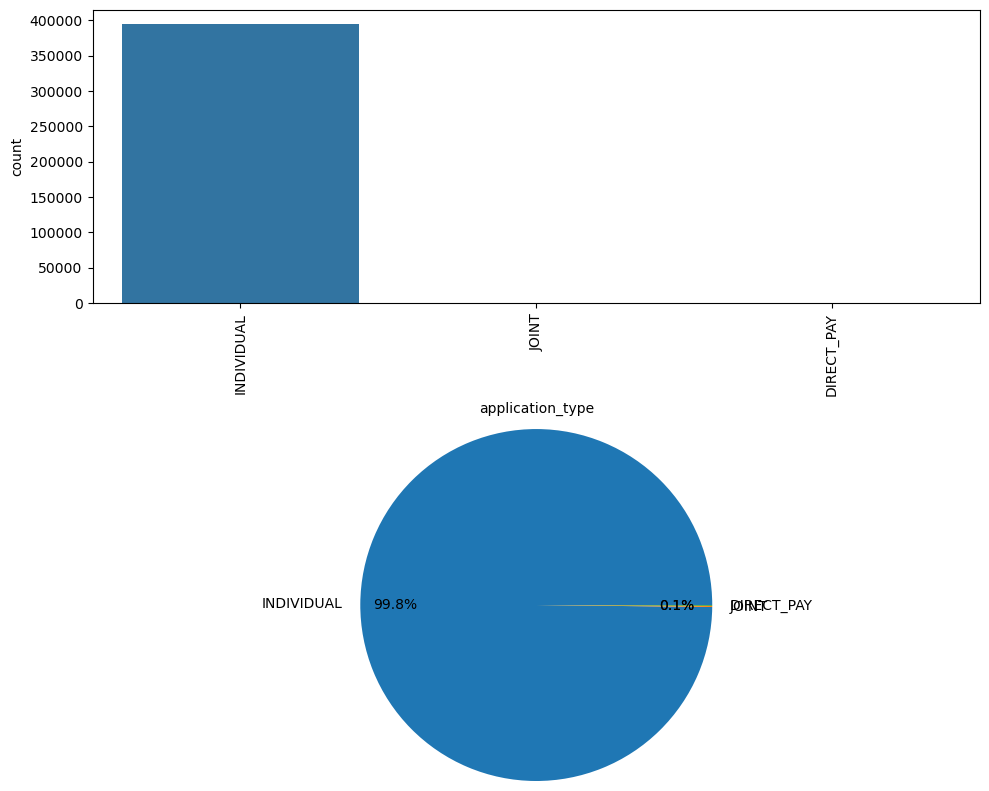

In [91]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.countplot(data=loantap, x='application_type')
plt.xticks(rotation=90)

plt.subplot(2,1,2)
plt.pie(loantap['application_type'].value_counts(), labels=loantap['application_type'].value_counts().index, autopct='%1.1f%%', radius=1.5, pctdistance=0.8)

plt.tight_layout()
plt.show()

The `application_type` feature reflects the channel or structure of the loan application:

**INDIVIDUAL: Borrower applied alone**

**JOINT: Borrower applied jointly with another person**

**DIRECT_PAY: Loan may be routed directly to a creditor (less common)**

However, INDIVIDUAL makes up nearly the entire dataset (99.8%), while JOINT and DIRECT_PAY are extremely rare.

=> We will group rare types i.e. JOINT and DIRECT_PAY into a separate category called OTHER. Further this feature will be one-hot encoded.

In [92]:
loantap['application_type'] = loantap['application_type'].apply(lambda x: x if x == 'INDIVIDUAL' else 'OTHER')

In [93]:
loantap['application_type'] = loantap['application_type'].map({'INDIVIDUAL':0, 'OTHER':1})

**`address`**

In [94]:
describe(loantap['address'])

Name: address
Number of unique values = 393700
Number of missing values = 0 (0.0%)

VALUE COUNTS:
address
USCGC Smith\r\nFPO AE 70466                           8
USS Johnson\r\nFPO AE 48052                           8
USNS Johnson\r\nFPO AE 05113                          8
USS Smith\r\nFPO AP 70466                             8
USNS Johnson\r\nFPO AP 48052                          7
                                                     ..
455 Tricia Cove\r\nAustinbury, FL 00813               1
7776 Flores Fall\r\nFernandezshire, UT 05113          1
6577 Mia Harbors Apt. 171\r\nRobertshire, OK 22690    1
8141 Cox Greens Suite 186\r\nMadisonstad, VT 05113    1
787 Michelle Causeway\r\nBriannaton, AR 48052         1
Name: count, Length: 393700, dtype: int64


We can extract two meaningful features from `address` i.e. `state_code` and `pincode`.

In [95]:
loantap['state_code'] = loantap['address'].str.strip().str.split().apply(lambda x: x[-2])
loantap['pincode'] = loantap['address'].str.strip().str.split().apply(lambda x: x[-1])

Let us explore `state_code` in detail.

In [96]:
describe(loantap['state_code'])

Name: state_code
Number of unique values = 54
Number of missing values = 0 (0.0%)

VALUE COUNTS:
state_code
AP    14308
AE    14157
AA    13919
NJ     7091
WI     7081
LA     7068
NV     7038
AK     7034
MA     7022
VA     7022
VT     7005
NY     7004
MS     7003
TX     7000
SC     6973
ME     6972
AR     6969
OH     6969
GA     6967
ID     6958
IN     6958
KS     6945
WV     6944
RI     6940
MO     6939
IL     6934
WY     6933
NE     6927
HI     6927
IA     6926
FL     6921
AZ     6918
CO     6914
OK     6911
CT     6904
MN     6904
NC     6901
OR     6898
CA     6898
AL     6898
MD     6896
WA     6895
UT     6887
SD     6887
MT     6883
DE     6874
TN     6869
ND     6858
MI     6854
DC     6842
NM     6842
PA     6825
NH     6818
KY     6800
Name: count, dtype: int64


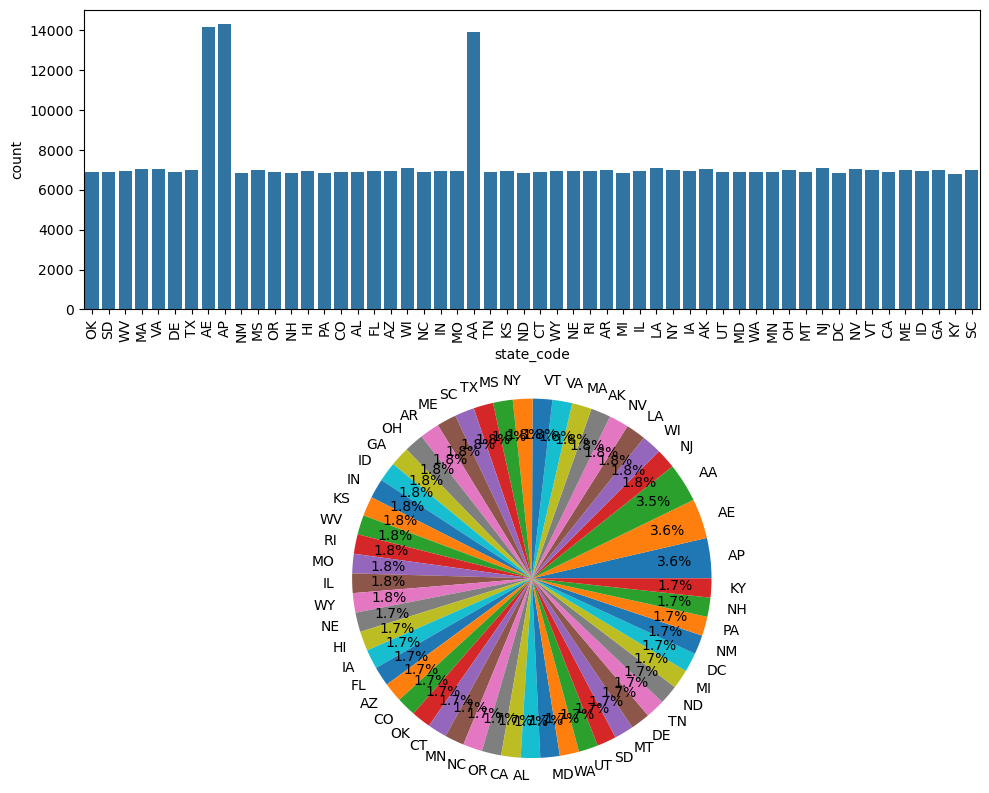

In [97]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.countplot(data=loantap, x='state_code')
plt.xticks(rotation=90)

plt.subplot(2,1,2)
plt.pie(loantap['state_code'].value_counts(), labels=loantap['state_code'].value_counts().index, autopct='%1.1f%%', radius=1.5, pctdistance=0.8)

plt.tight_layout()
plt.show()

Despite having 54 unique values, all are well-distributed and standard. No major imbalance is present. 

=> We will apply one-hot encoding to this feature.

In [98]:
loantap = pd.get_dummies(loantap, columns=['state_code'], prefix='state', drop_first=True)

Let us explore `pincode` in detail.

In [99]:
describe(loantap['pincode'])

Name: pincode
Number of unique values = 10
Number of missing values = 0 (0.0%)

VALUE COUNTS:
pincode
70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: count, dtype: int64


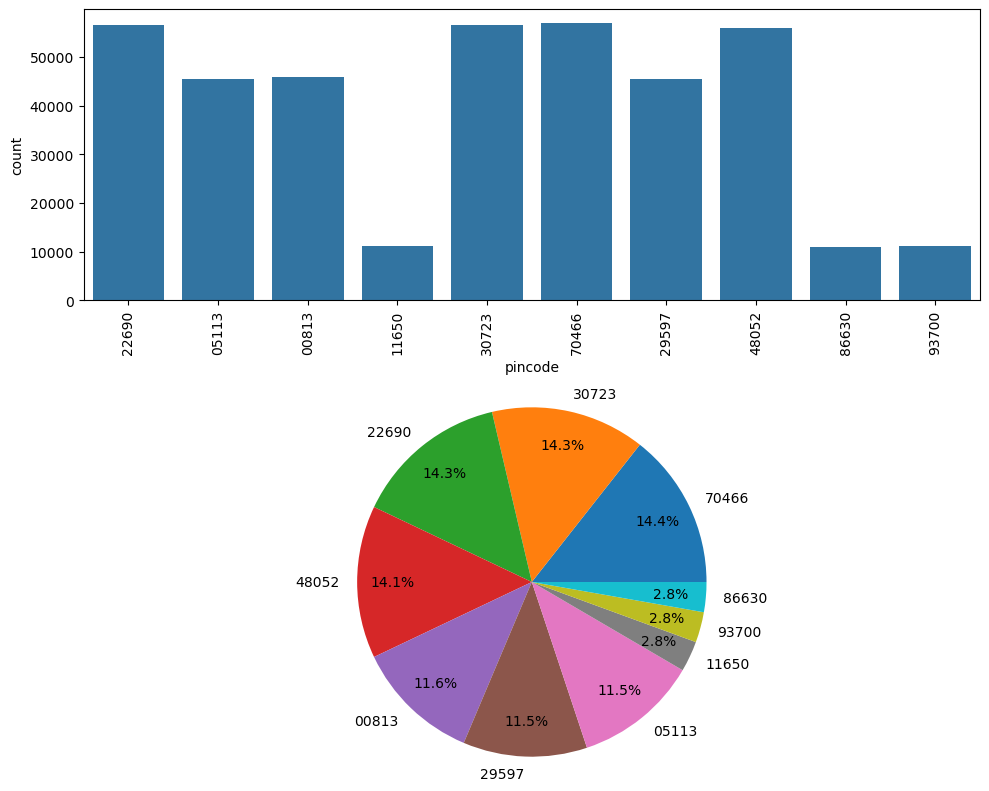

In [100]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.countplot(data=loantap, x='pincode')
plt.xticks(rotation=90)

plt.subplot(2,1,2)
plt.pie(loantap['pincode'].value_counts(), labels=loantap['pincode'].value_counts().index, autopct='%1.1f%%', radius=1.5, pctdistance=0.8)

plt.tight_layout()
plt.show()

The `pincode` feature is clean and low-cardinality, making it well-suited for use in modeling. 

=> It will be one-hot encoded for logistic regression.

In [101]:
loantap = pd.get_dummies(loantap, columns=['pincode'], prefix='zip', drop_first=True)

Now we can remove the feature `address`.

In [102]:
loantap.drop(columns='address', inplace=True)

### 1.4 Bivariate Analysis

#### 1.4.1 Relation with `loan_status_fully_paid`

`annual_inc`

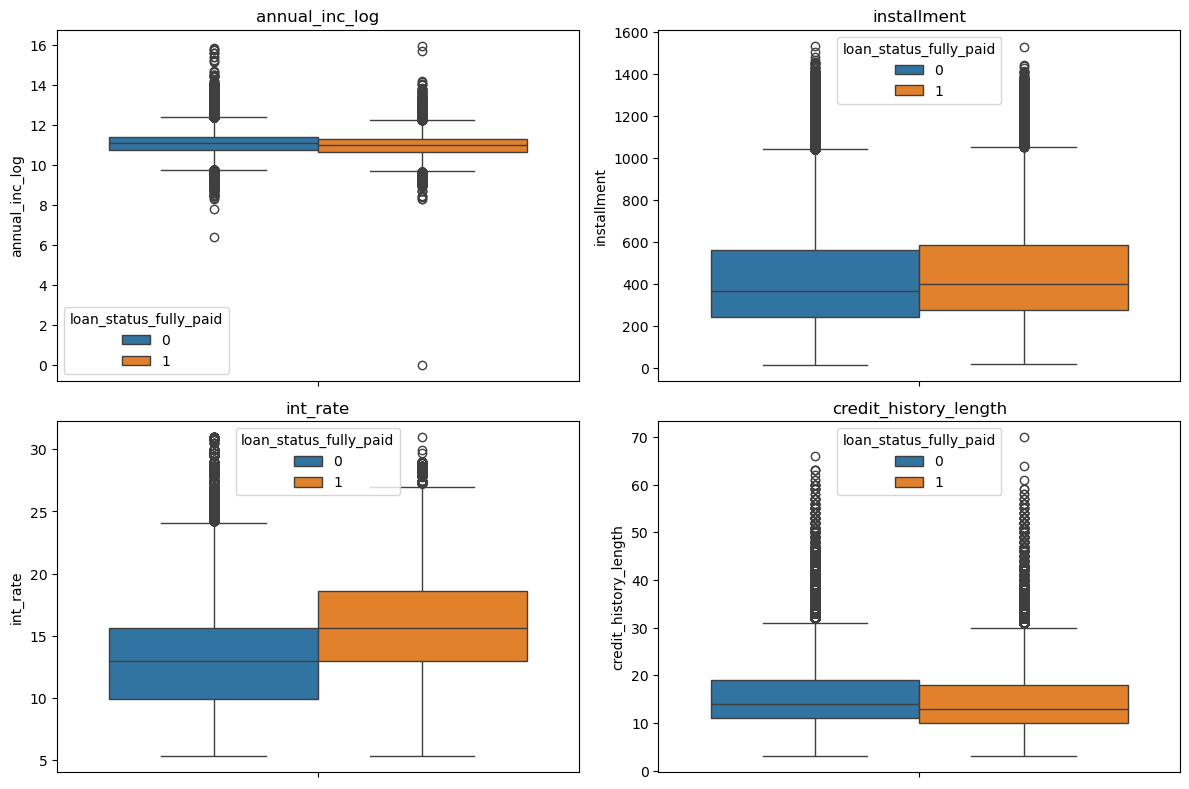

In [220]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title('annual_inc_log')
sns.boxplot(loantap, y='annual_inc_log', hue='loan_status_fully_paid')

plt.subplot(2,2,2)
plt.title('installment')
sns.boxplot(loantap, y='installment', hue='loan_status_fully_paid')

plt.subplot(2,2,3)
plt.title('int_rate')
sns.boxplot(loantap, y='int_rate', hue='loan_status_fully_paid')

plt.subplot(2,2,4)
plt.title('credit_history_length')
sns.boxplot(loantap, y='credit_history_length', hue='loan_status_fully_paid')

plt.tight_layout()
plt.show()

**Insights**:
* Annual Income, Installment amount and credit history length follow a similar distribution for defaulters as well as non-defaulters.
* The interest rate for defaulters is significantly higher than non-defaulters. This is valid, since Lenders like LoanTap assign higher interest rates to riskier borrowers to compensate for potential loss.

`grade` and `sub_grade`

In [224]:
loantap3 = pd.read_csv('logistic_regression.csv')
loantap3['state_code'] = loantap3['address'].str.strip().str.split().apply(lambda x: x[-2])
loantap3['pincode'] = loantap3['address'].str.strip().str.split().apply(lambda x: x[-1])

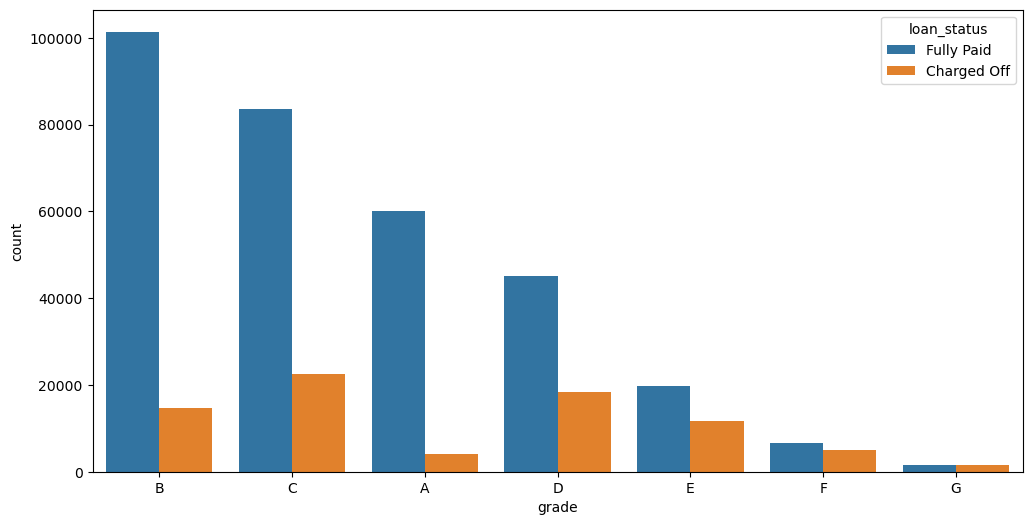

In [241]:
plt.figure(figsize=(12,6))
sns.countplot(loantap3, x='grade',hue='loan_status', order=loantap3['grade'].value_counts().index)
plt.show()

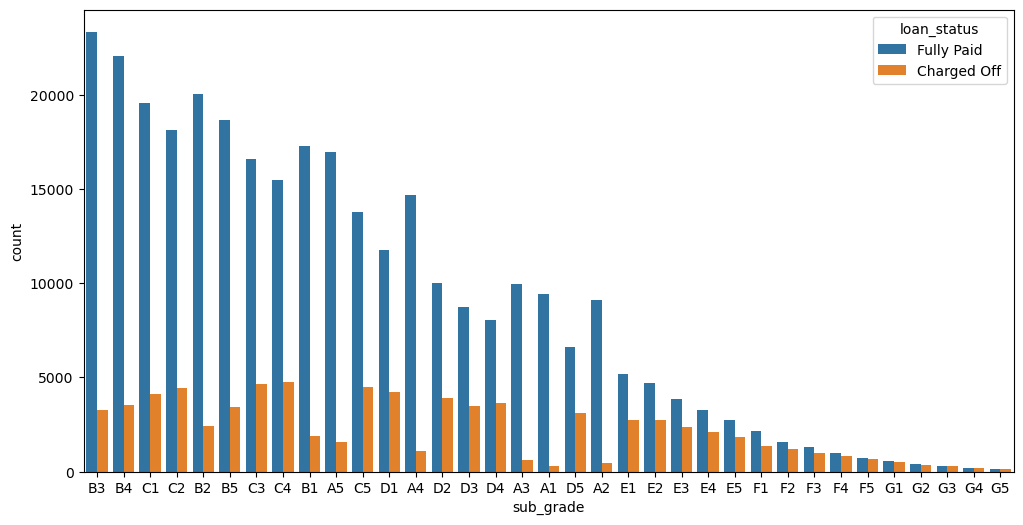

In [240]:
plt.figure(figsize=(12,6))
sns.countplot(loantap3, x='sub_grade',hue='loan_status',order=loantap3['sub_grade'].value_counts().index)
plt.show()

**Insights**:
* Most loans are issued from borrowers with grades B and C.
* These grades are the “grey zone” i.e. not too risky to reject, but not safe either. LoanTap likely sees most defaults here because these borrowers have decent credit but also visible risk indicators like high DTI, shorter employment, lower income, or high utilization.

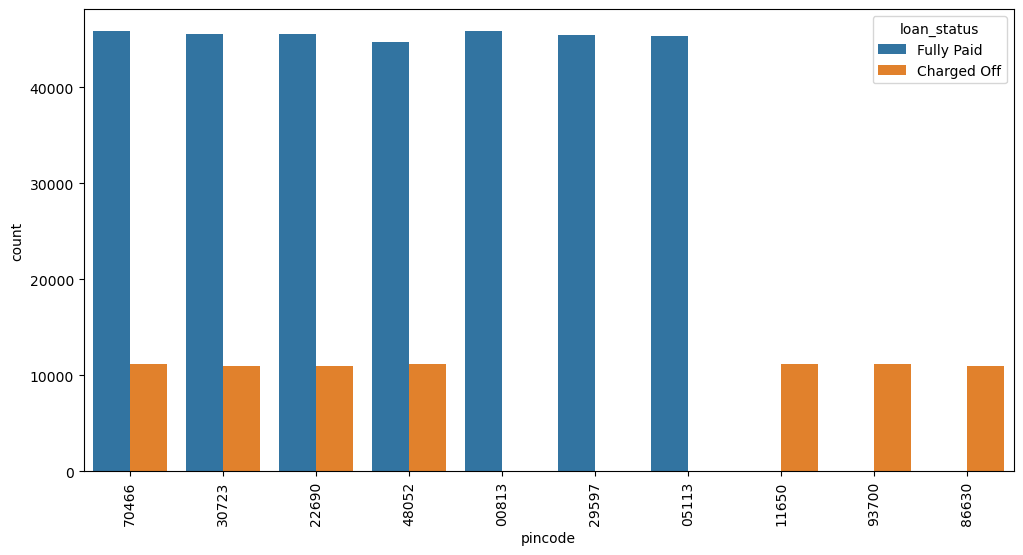

In [243]:
plt.figure(figsize=(12,6))
sns.countplot(loantap3, x='pincode',hue='loan_status', order=loantap3['pincode'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

**Insights**:
* All the borrowers from ZIP codes 00813, 29597, 05113 have fully paid back their loans.
* All the borrowers from ZIP codes 11650, 93700, 86630 are defaulters, making these ZIP codes alarming.

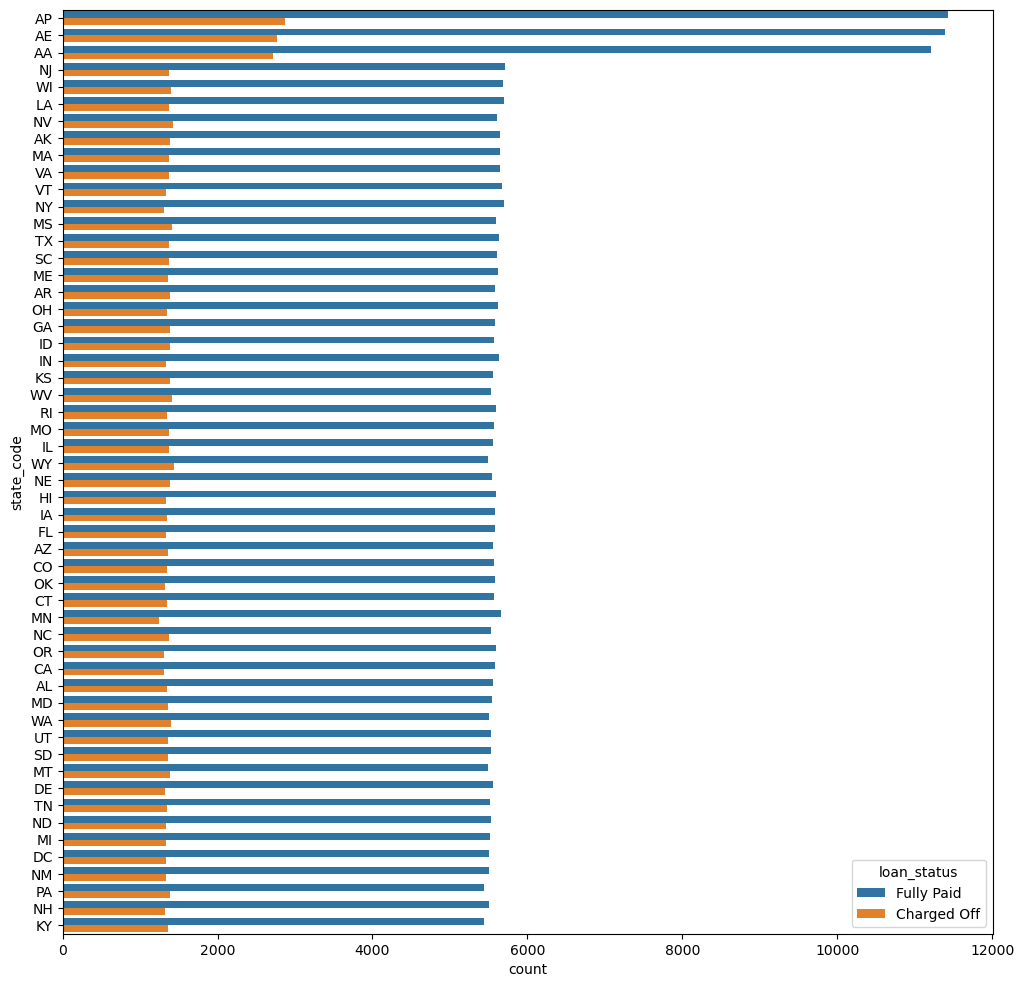

In [242]:
plt.figure(figsize=(12,12))
sns.countplot(loantap3, y='state_code',hue='loan_status', order=loantap3['state_code'].value_counts().index)
plt.show()

**Insights**:
* Majority of borrowers come from states AP, AE and AA.
* The distribution of defaulters and non-defaulters across all the states is fairly similar.

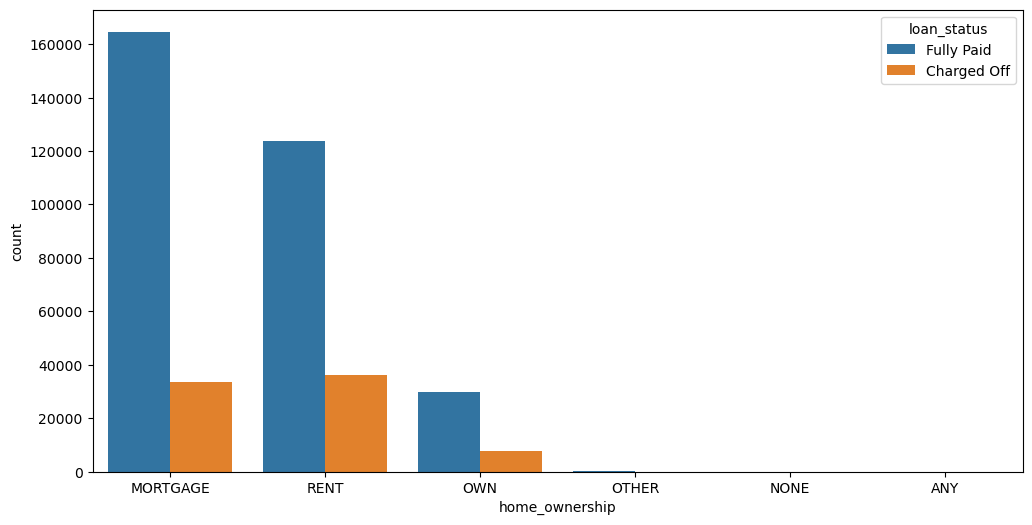

In [244]:
plt.figure(figsize=(12,6))
sns.countplot(loantap3, x='home_ownership',hue='loan_status', order=loantap3['home_ownership'].value_counts().index)
plt.show()

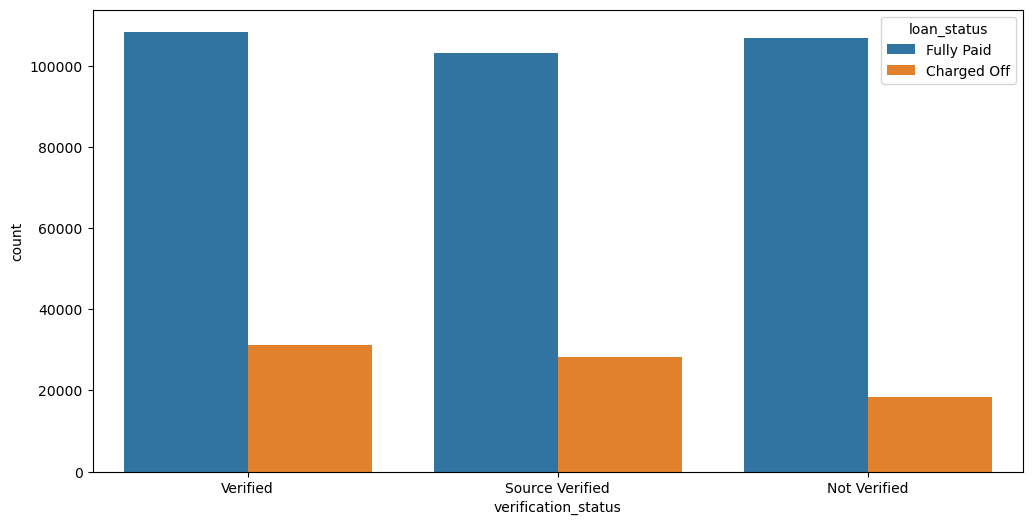

In [246]:
plt.figure(figsize=(12,6))
sns.countplot(loantap3, x='verification_status',hue='loan_status', order=loantap3['verification_status'].value_counts().index)
plt.show()

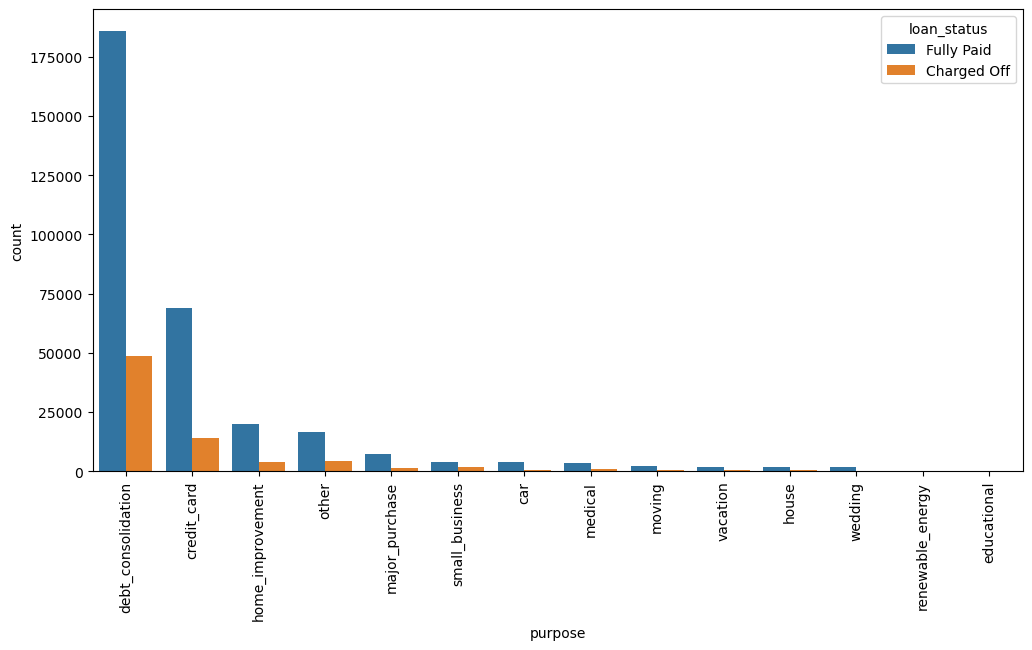

In [249]:
plt.figure(figsize=(12,6))
sns.countplot(loantap3, x='purpose',hue='loan_status', order=loantap3['purpose'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### 1.4.2 Correlation Analysis

Now that we have a preprocessed dataframe of raw data, let us dive into Bivariate analysis. Let us explore the features with high correlation coefficients (>= 0.7).

In [103]:
loantap_corr = loantap.corr()

for i,c1 in enumerate(loantap_corr.columns):
    for j,c2 in enumerate(loantap_corr.columns):
        if i>j:
            if abs(loantap_corr.loc[c1,c2]) >= 0.7 and c1 != c2:
                print(c1, ',', c2, '->', round(loantap_corr.loc[c1,c2],2), '\n')

installment , loan_amnt -> 0.95 

pub_rec_flag , pub_rec_bankruptcies -> 0.83 

pub_rec_bankruptcies_flag , pub_rec_bankruptcies -> 0.95 

pub_rec_bankruptcies_flag , pub_rec_flag -> 0.87 

sub_grade_encoded , int_rate -> 0.97 



**Insights**:
1. It is understandable that higher the loan amount, higher will be the monthly repayment amount.
2. The sub grade and interest rate have a really high positive correlation. This makes sense, since lending platforms assign sub-grades based on borrower creditworthiness. Higher risk borrowers (G5, F4, etc.) are charged higher interest rates to compensate for default risk. So, this correlation is not only expected but designed — subgrades are a risk score tier system.
3. Higher number of bankruptcy records of a borrower (pub_rec_bankruptcies) would naturally result in higher Negative records on borrower's public credit profile (pub_rec), resulting in respective higher flags as well (pub_rec_bankruptcies_flag, pub_rec_flag).

Let us verify these observations graphically.

In [187]:
high_corr_df = loantap[['loan_status_fully_paid','installment','loan_amnt','pub_rec_flag','pub_rec_bankruptcies','pub_rec_bankruptcies_flag','sub_grade_encoded','int_rate']]

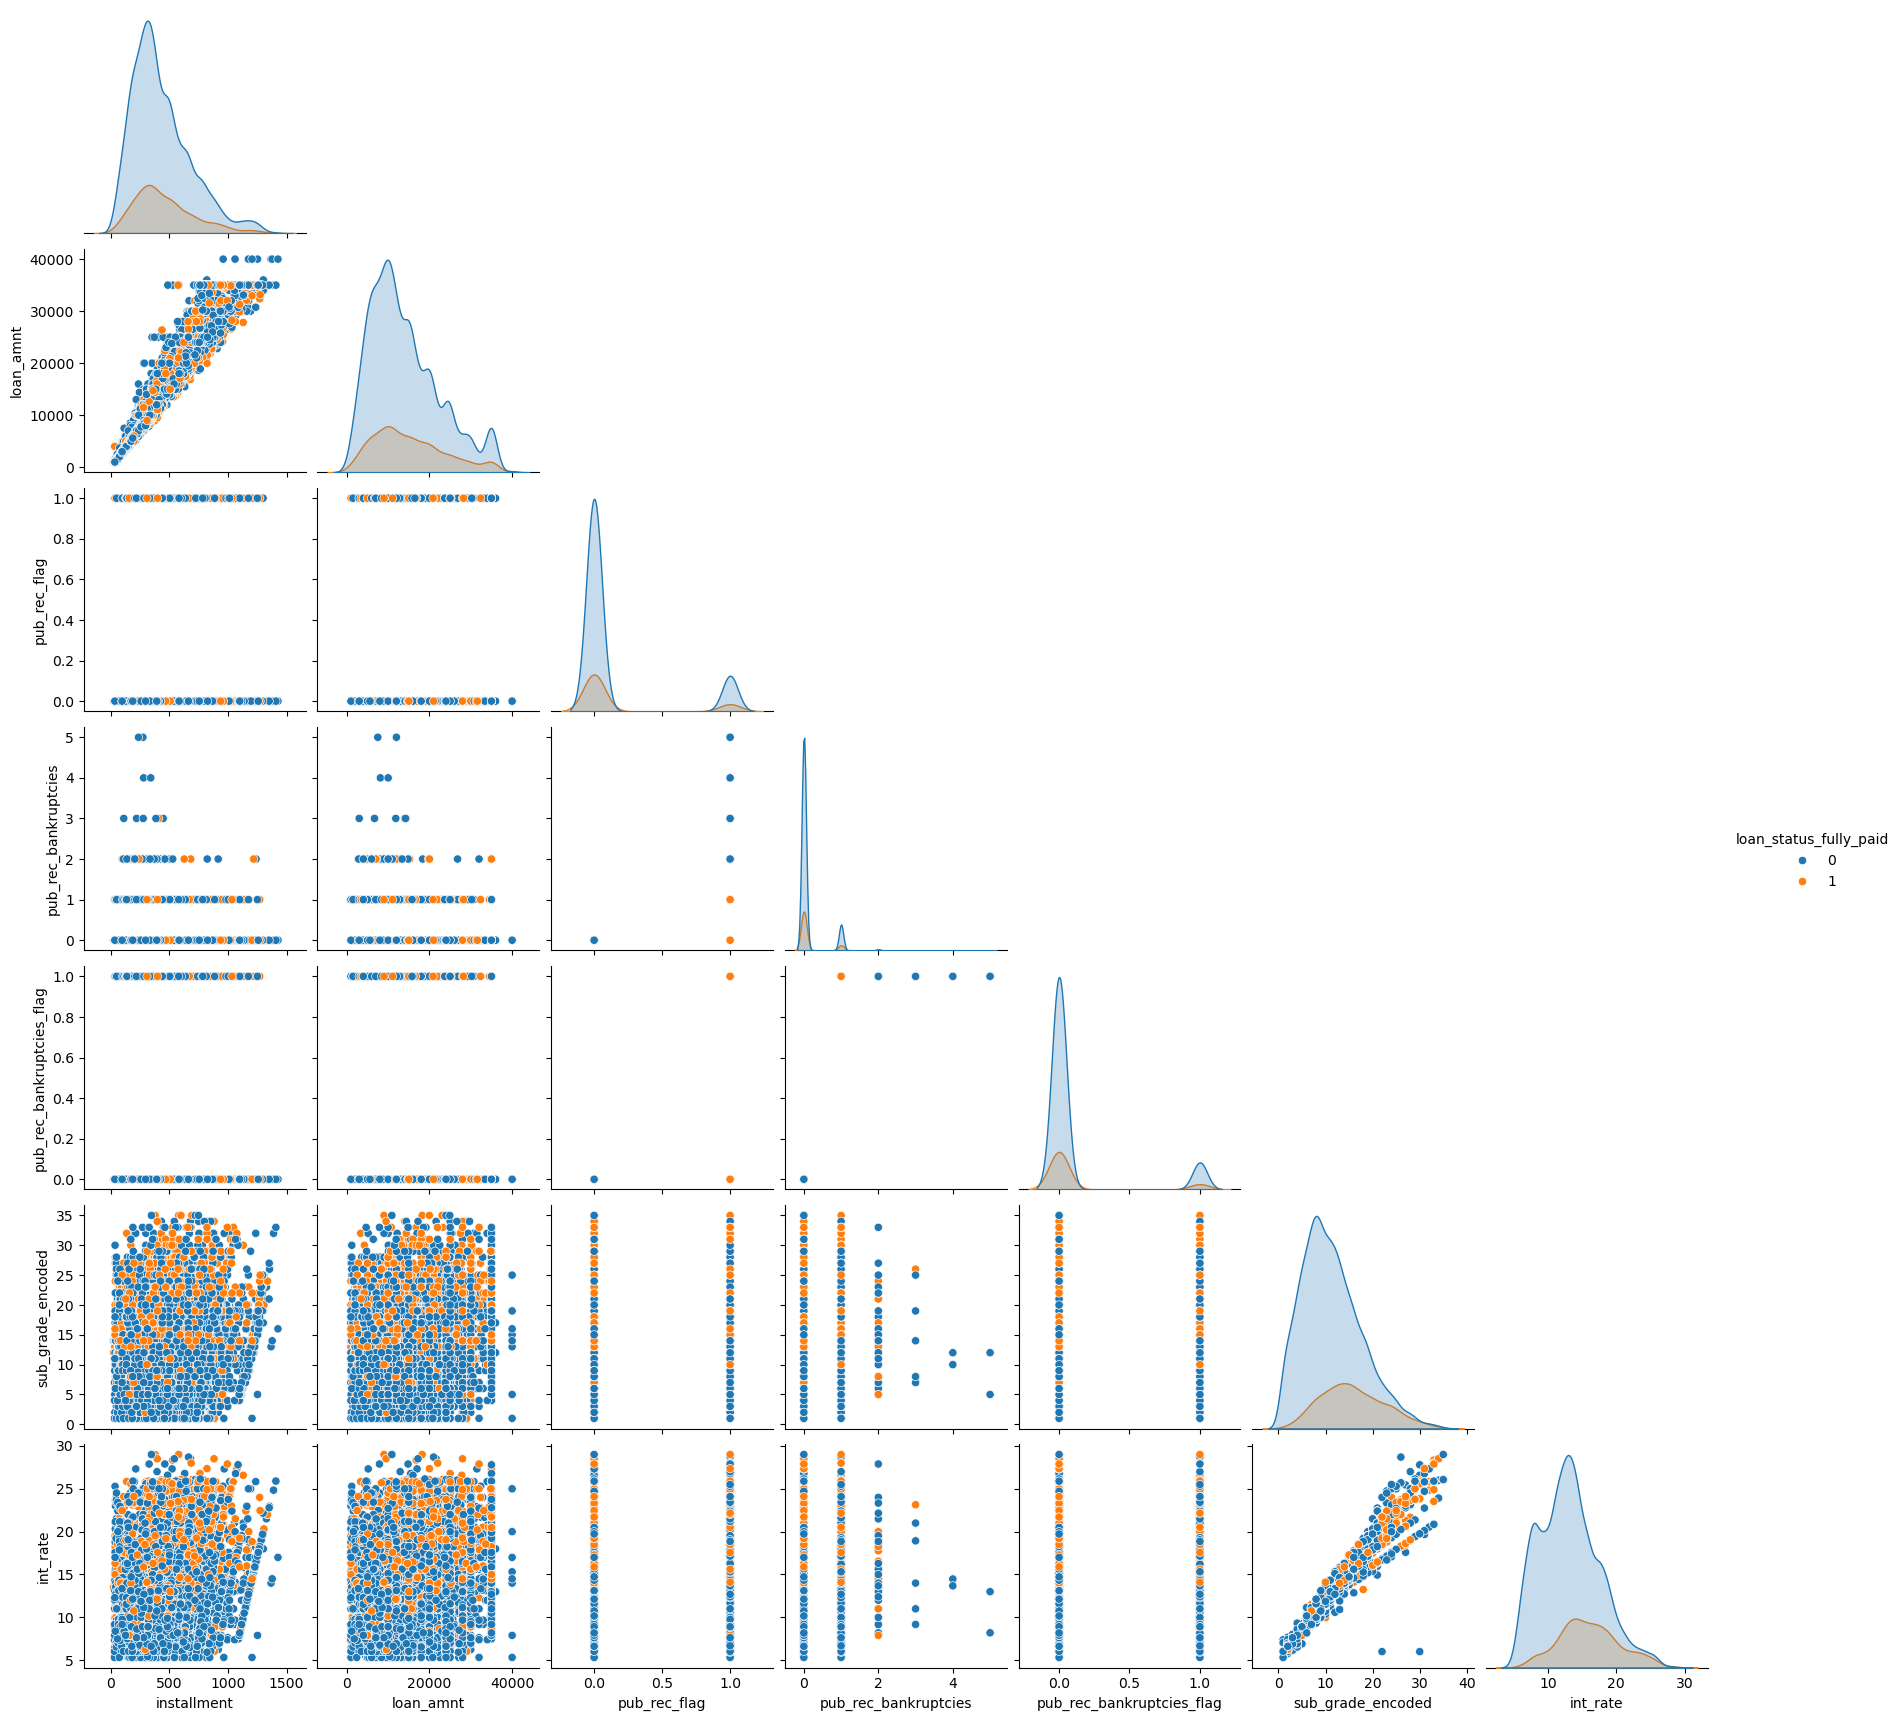

In [189]:
high_corr_df_sample = high_corr_df.sample(10000)
sns.pairplot(high_corr_df_sample, corner=True, hue='loan_status_fully_paid')
plt.show()

**Insights**:
1. `loan_amnt` and `installment` are highly positively correlated. Similarly, `sub_grade_encoded` and `int_rate` are highly positively correlated.
2. The high sub grades (> 15 i.e grades C and above) are associated with higher number of defaulters.
3. The defaulters are mostly associated with higher `sub_grade_encoded` and higher `int_rate`.

Now, let us explore other features as well, using pairplot.

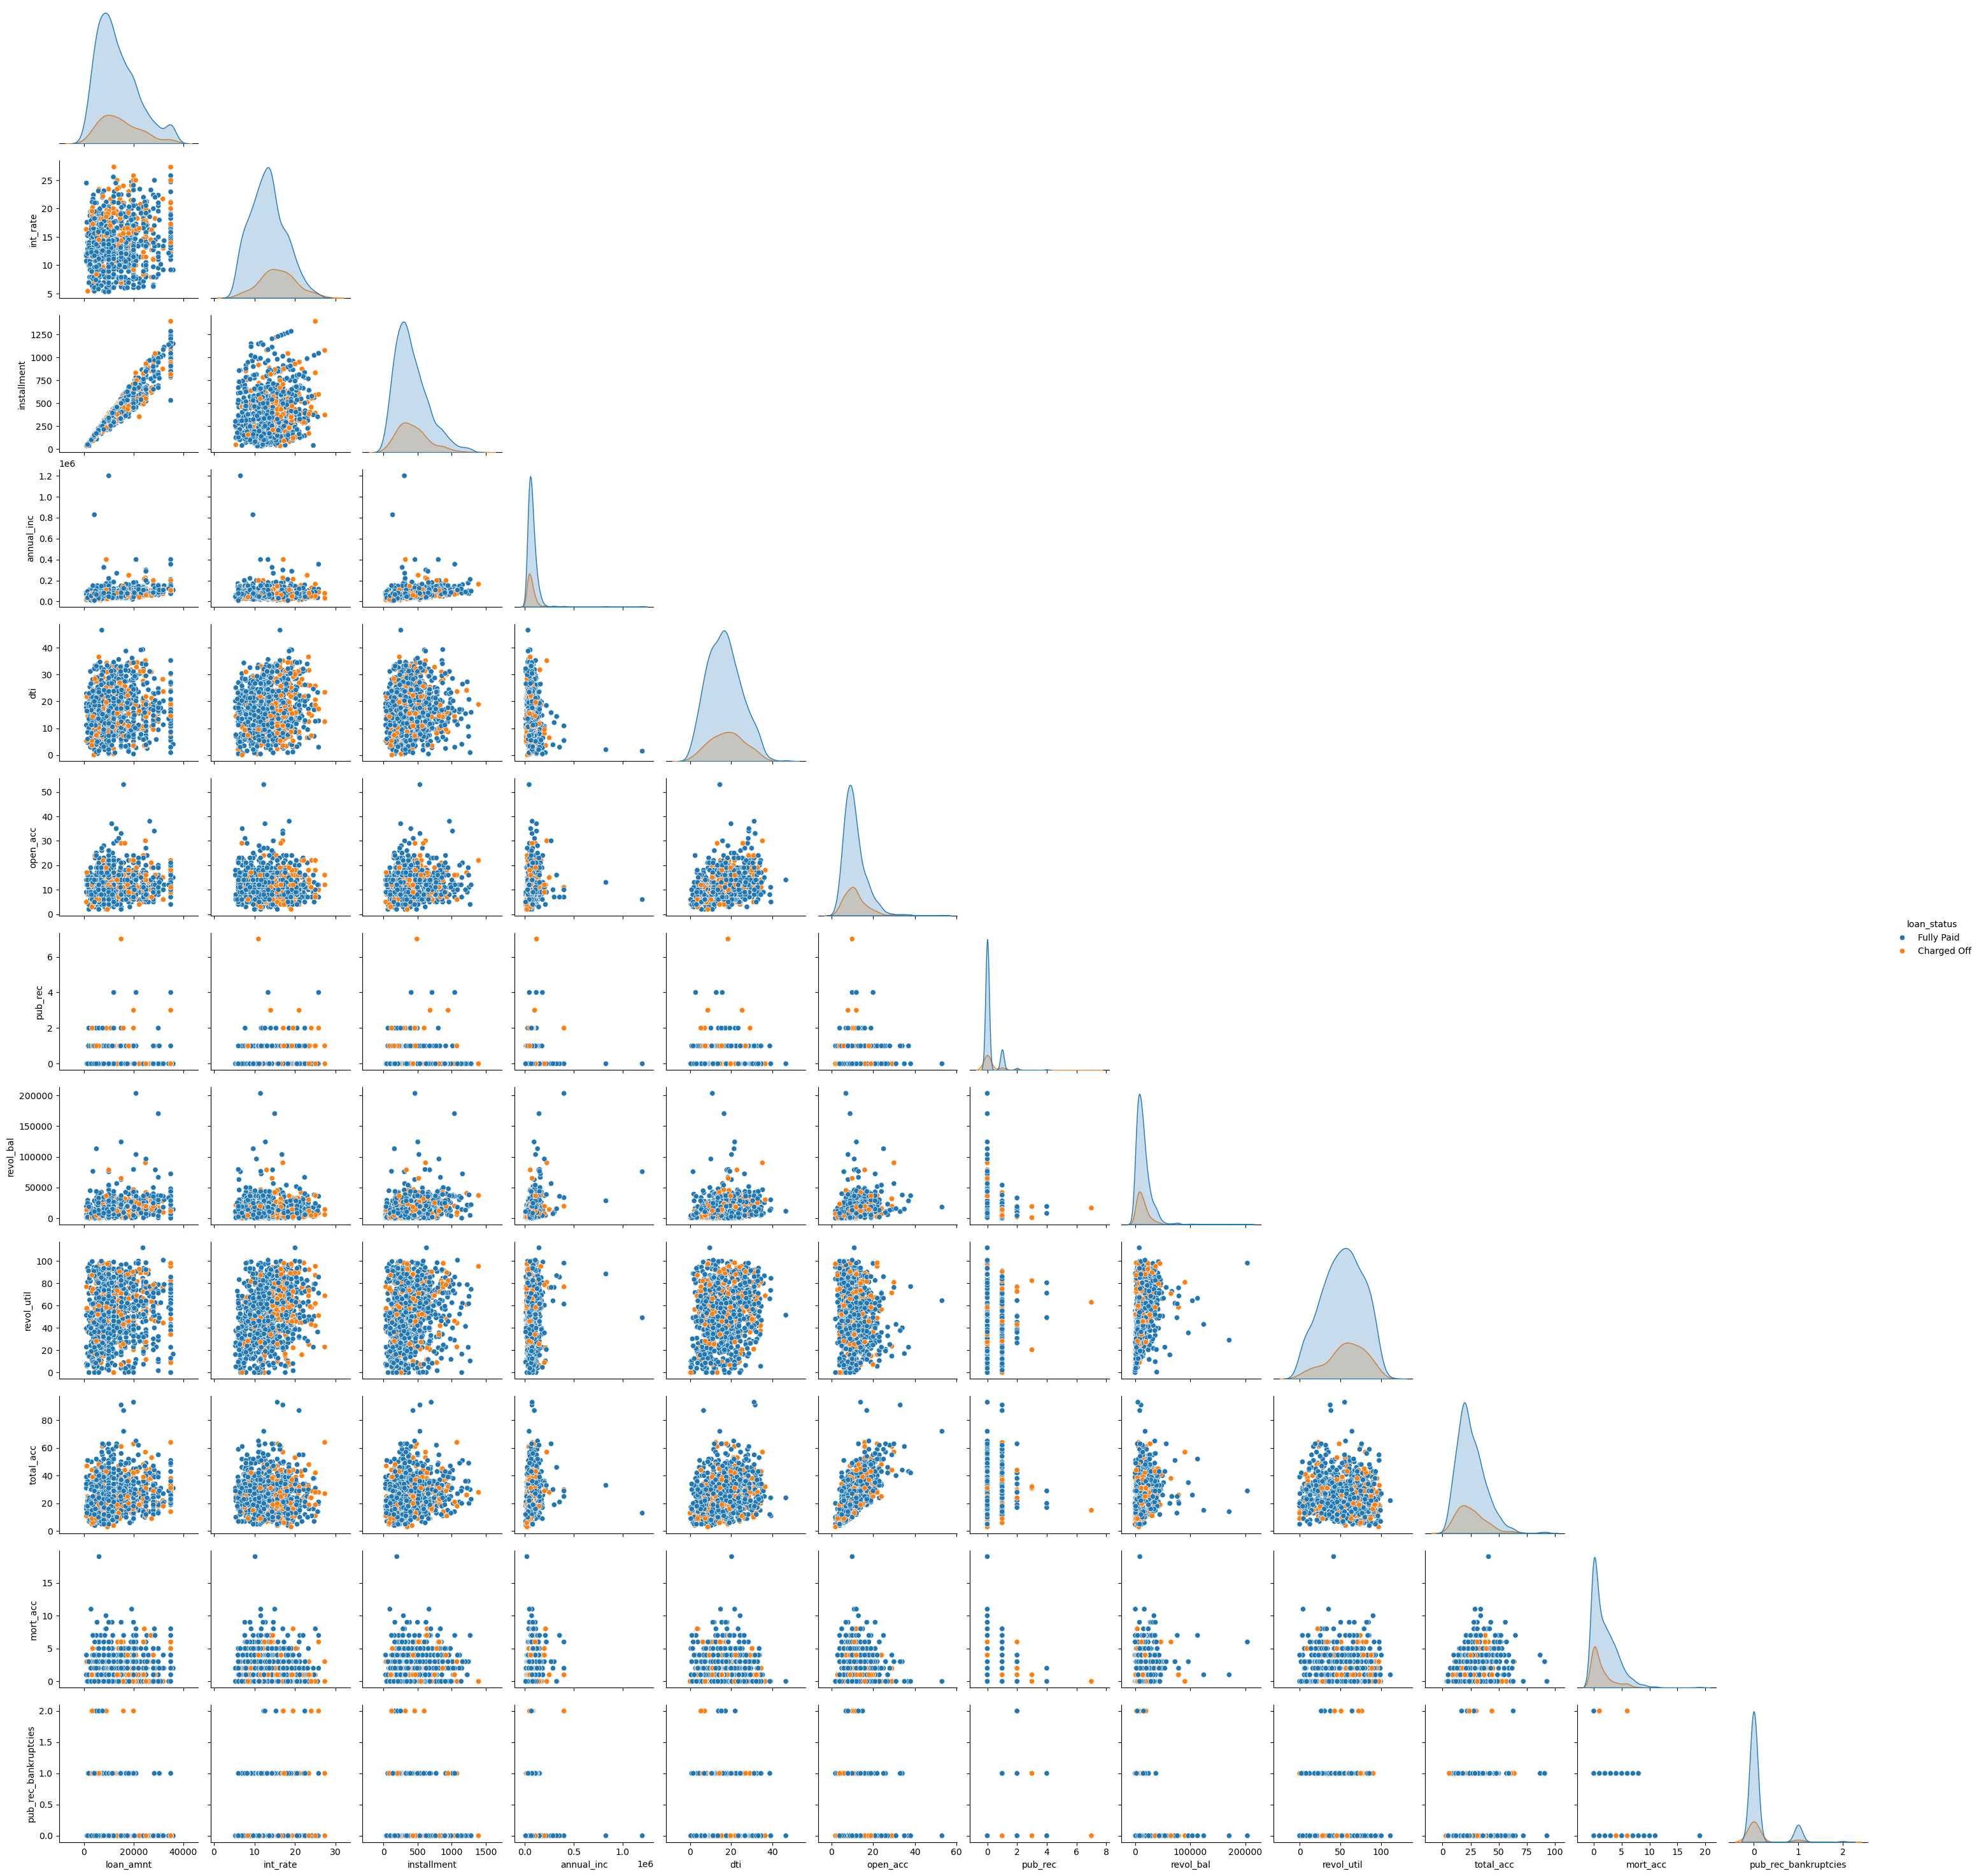

In [104]:
loantap2 = pd.read_csv('logistic_regression.csv')
loantap_sample = loantap2.sample(1000)
sns.pairplot(loantap_sample, corner=True, hue='loan_status')
plt.show()

## 2. Data Preprocessing Pipeline

Let us create preprocessing pipeline.

In [105]:
def split_X_y(df):
    # Target variable
    X = df.drop(columns=['loan_status'])
    y = df['loan_status'].map({'Fully Paid':0, 'Charged Off':1})
    return X,y

In [106]:
def preprocess(train, val, test):

    final_df_list = []
    
    # Simple Imputer
    si1 = SimpleImputer(strategy='median')
    si2 = SimpleImputer(strategy='median')
    si3 = SimpleImputer(strategy='median')

    for i,df in enumerate([train, val, test]):
        # Numerical features
        df['annual_inc_log'] = np.log1p(df['annual_inc'])
        df = df.drop(columns='annual_inc')
        
        df['dti'] = df['dti'].clip(upper=100)
        
        df['pub_rec_flag'] = df['pub_rec'].apply(lambda x: 0 if x==0 else 1)
        df = df.drop(columns='pub_rec')
    
        df['revol_bal_log'] = np.log1p(df['revol_bal'])
        df = df.drop(columns='revol_bal')
    
        df['revol_util'] = df['revol_util'].clip(upper=100)
        if i == 0:
            si1.fit(df[['revol_util']])
        df['revol_util'] = si1.transform(df[['revol_util']])
    
        if i == 0:
            si2.fit(df[['mort_acc']])
        df['mort_acc'] = si2.transform(df[['mort_acc']])
        df['mort_acc_flag'] = df['mort_acc'].apply(lambda x: 0 if x==0 else 1)
    
        df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)
        df['pub_rec_bankruptcies_flag'] = df['pub_rec_bankruptcies'].apply(lambda x: 0 if x==0 else 1)
    
        # Datetime related features
        df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')
        df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
        df['credit_history_length'] = (df['issue_d'] - df['earliest_cr_line']).dt.days//365
        df = df.drop(columns=['earliest_cr_line','issue_d'])
    
        # Categorical features
        df['term_60_months'] = pd.get_dummies(df['term'], drop_first=True, dtype=int)
        df = df.drop(columns='term')
    
        df = df.drop(columns='grade')
    
        subgrade_order = [
        'A1', 'A2', 'A3', 'A4', 'A5',
        'B1', 'B2', 'B3', 'B4', 'B5',
        'C1', 'C2', 'C3', 'C4', 'C5',
        'D1', 'D2', 'D3', 'D4', 'D5',
        'E1', 'E2', 'E3', 'E4', 'E5',
        'F1', 'F2', 'F3', 'F4', 'F5',
        'G1', 'G2', 'G3', 'G4', 'G5'
        ]
        # Ensure all subgrades are in the predefined order
        unknown_grades = set(df['sub_grade']) - set(subgrade_order)
        if unknown_grades:
            raise ValueError(f"Unknown subgrades found: {unknown_grades}")
        subgrade_map = {grade: i + 1 for i, grade in enumerate(subgrade_order)}
        df['sub_grade_encoded'] = df['sub_grade'].map(subgrade_map)
        df = df.drop(columns='sub_grade')
    
        df = df.drop(columns='title')
    
        df = pd.get_dummies(df, columns=['purpose'], prefix='purpose', drop_first=True, dtype=int)
    
        df = df.drop(columns='emp_title')
    
        emp_length_map = {
        '< 1 year': 0,
        '1 year': 1,
        '2 years': 2,
        '3 years': 3,
        '4 years': 4,
        '5 years': 5,
        '6 years': 6,
        '7 years': 7,
        '8 years': 8,
        '9 years': 9,
        '10+ years': 10
        }
        df['emp_length'] = df['emp_length'].map(emp_length_map)
        if i == 0:
            si3.fit(df[['emp_length']])
        df['emp_length'] = si3.transform(df[['emp_length']])
    
        df['home_ownership'] = df['home_ownership'].replace({'NONE': 'OTHER', 'ANY': 'OTHER'})
        df = pd.get_dummies(df, columns=['home_ownership'], prefix='home', drop_first=True, dtype=int)
    
        df = pd.get_dummies(df, columns=['verification_status'], prefix='verification_status', drop_first=True, dtype=int)
    
        df['initial_list_status'] = df['initial_list_status'].map({'f': 0, 'w': 1})
    
        df['application_type'] = df['application_type'].apply(lambda x: x if x == 'INDIVIDUAL' else 'OTHER')
        df['application_type'] = df['application_type'].map({'INDIVIDUAL': 0, 'OTHER': 1})
    
        df['state_code'] = df['address'].str.strip().str.split().apply(lambda x: x[-2])
        df = pd.get_dummies(df, columns=['state_code'], prefix='state', drop_first=True, dtype=int)
        
        df['pincode'] = df['address'].str.strip().str.split().apply(lambda x: x[-1])
        df = pd.get_dummies(df, columns=['pincode'], prefix='zip', drop_first=True, dtype=int)
    
        df = df.drop(columns='address')
        
        assert df.isna().sum().sum() == 0
        
        final_df_list.append(df)

    return final_df_list[0], final_df_list[1], final_df_list[2]

The following function handles the removal of multicollinear features, using iterative Variance Inflation Factor (VIF) reduction, below a specified threshold.

In [107]:
def iterative_vif_reduction(df, threshold=10.0, verbose=True):
    # Sample data if large
    if len(df) > 10000:
        X = df.sample(n=10000, random_state=42)
    else:
        X = df.copy()

    while True:
        if X.shape[1] == 0:
            if verbose:
                print("All features dropped due to high VIF.")
            return X

        X_const = add_constant(X, has_constant='add')  # Always add a const
        vif = pd.Series(
            [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])],
            index=X_const.columns
        )
        vif = vif[vif.index != 'const']  # Safe removal of const if present

        max_vif = vif.max()
        if max_vif < threshold:
            break

        feature_to_drop = vif.idxmax()
        X = X.drop(columns=[feature_to_drop])
        if verbose:
            print(f"Dropped '{feature_to_drop}' with VIF = {max_vif:.2f}")

    print(f'RETAINED FEATURES:\n{X.columns}')

    return X.columns

Below is the full final pipeline.

In [108]:
def full_pipeline(raw_df,
                  random_state=42, 
                  vif_threshold=5.0, 
                  verbose=True):
    
    # Step 1: Split into X and y
    print('Step 1: Split into X and y')
    X,y = split_X_y(raw_df)
    print('COMPLETED')
    print('--------------------------------------------------------------------')

    # Step 2: Initial train-test split
    print('Step 2: Initial train-test split')
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
    print('COMPLETED')
    print('--------------------------------------------------------------------')
    
    # Step 3: Further split temp into train and val
    print('Step 3: Further split temp into train and val')
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=random_state, stratify=y_temp)
    print('COMPLETED')
    print('--------------------------------------------------------------------')
    
    # Step 4: Preprocess data
    print('Step 4: Preprocess data')
    X_train, X_val, X_test = preprocess(X_train, X_val, X_test)
    print('COMPLETED')
    print('--------------------------------------------------------------------')

    # Step 5: VIF reduction (fit on train only)
    print('Step 5: VIF reduction (fit on train only)')
    selected_features = iterative_vif_reduction(X_train, threshold=vif_threshold, verbose=verbose)
    print('COMPLETED')
    print('--------------------------------------------------------------------')

    # Step 6: Reduce val and test to same features
    print('Step 6: Reduce val and test to same features')
    # selected_features = X_train_reduced.columns
    X_train_reduced = X_train[selected_features]
    X_val_reduced = X_val[selected_features]
    X_test_reduced = X_test[selected_features]
    print('COMPLETED')
    print('--------------------------------------------------------------------')

    # Step 7: Scale features (fit on train only)
    print('Step 7: Scale features (fit on train only)')
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_reduced), columns=X_train_reduced.columns, index=X_train_reduced.index)
    X_val_scaled = pd.DataFrame(scaler.transform(X_val_reduced), columns=X_val_reduced.columns, index=X_val_reduced.index)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test_reduced), columns=X_test_reduced.columns, index=X_test_reduced.index)
    print('COMPLETED')
    print('--------------------------------------------------------------------')

    # Step 8: Handling Class Imbalance in Training Data using SMOTE
    print('Step 8: Handling Class Imbalance in Training Data using SMOTE')
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
    print('COMPLETED')
    print('--------------------------------------------------------------------')

    print('FULL PIPELINE EXECUTED!')
    print(f'OUTPUTS: \nX_train {X_train_res.shape}, y_train {y_train_res.shape} \nX_val {X_val_scaled.shape}, y_val {y_val.shape} \nX_test {X_test_scaled.shape}, y_test {y_test.shape}')
    
    return X_train_res, y_train_res, X_val_scaled, y_val, X_test_scaled, y_test

Now let us implement this pipeline on the raw data.

In [109]:
raw_df = pd.read_csv('logistic_regression.csv')
X_train, y_train, X_val, y_val, X_test, y_test = full_pipeline(raw_df)

Step 1: Split into X and y
COMPLETED
--------------------------------------------------------------------
Step 2: Initial train-test split
COMPLETED
--------------------------------------------------------------------
Step 3: Further split temp into train and val
COMPLETED
--------------------------------------------------------------------
Step 4: Preprocess data
COMPLETED
--------------------------------------------------------------------
Step 5: VIF reduction (fit on train only)
Dropped 'loan_amnt' with VIF = 57.48
Dropped 'sub_grade_encoded' with VIF = 22.42
Dropped 'purpose_debt_consolidation' with VIF = 18.98
Dropped 'pub_rec_bankruptcies_flag' with VIF = 14.12
RETAINED FEATURES:
Index(['int_rate', 'installment', 'emp_length', 'dti', 'open_acc',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'annual_inc_log', 'pub_rec_flag',
       'revol_bal_log', 'mort_acc_flag', 'credit_history_length',
       'term_60_m

Thus we have our training, validation and test sets.

## 3. Building The Model

### 3.1 Initializing

Let us instantiate a basic Logistic Regression model, with no penalty. For large datasets, **'saga'** solver is recommended. 

In [110]:
log_reg = LogisticRegression(penalty=None, 
                             solver='saga', 
                             max_iter=10000,
                             tol=1e-3,
                             n_jobs=-1,
                             random_state=42, 
                             verbose=1)
log_reg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 263 epochs took 109 seconds


LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=42,
                   solver='saga', tol=0.001, verbose=1)

In [133]:
def evaluate(model):
    acc_train = model.score(X_train, y_train)
    acc_val = model.score(X_val, y_val)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    f1_train = f1_score(y_train, y_train_pred)
    f1_val = f1_score(y_val, y_val_pred)

    y_train_prob = model.predict_proba(X_train)[:,1]
    y_val_prob = model.predict_proba(X_val)[:,1]

    print('ACCURACY')
    print(f'Training = {acc_train:.4f}')
    print(f'Validation = {acc_val:.4f}')
    print('----------------------------------------------------------------')
    print('F1 SCORE')
    print(f'Training = {f1_train:.4f}')
    print(f'Validation = {f1_val:.4f}')
    print('----------------------------------------------------------------')
    print('CLASSIFICATION REPORT FOR VALIDATION SET')
    print(classification_report(y_val, log_reg.predict(X_val)))
    print('----------------------------------------------------------------')

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.title('CONFUSION MATRIX')

    plt.figure(figsize=(12,6))
    # ROC
    fpr, tpr, _ = roc_curve(y_val, y_val_prob)
    roc_auc = roc_auc_score(y_val, y_val_prob)
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'ROC Curve (AUC = {roc_auc:.4f})')
    
    # PR
    precision, recall, thresholds = precision_recall_curve(y_val, y_val_prob)
    pr_auc = auc(recall, precision)
    plt.subplot(1,2,2)
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve (AUC = {pr_auc:.4f})")
    
    plt.tight_layout()
    plt.show()

    return y_train_pred, y_val_pred, y_train_prob, y_val_prob, precision, recall, thresholds

ACCURACY
Training = 0.8079
Validation = 0.8052
----------------------------------------------------------------
F1 SCORE
Training = 0.8080
Validation = 0.6142
----------------------------------------------------------------
CLASSIFICATION REPORT FOR VALIDATION SET
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     63672
           1       0.50      0.79      0.61     15534

    accuracy                           0.81     79206
   macro avg       0.72      0.80      0.74     79206
weighted avg       0.85      0.81      0.82     79206

----------------------------------------------------------------


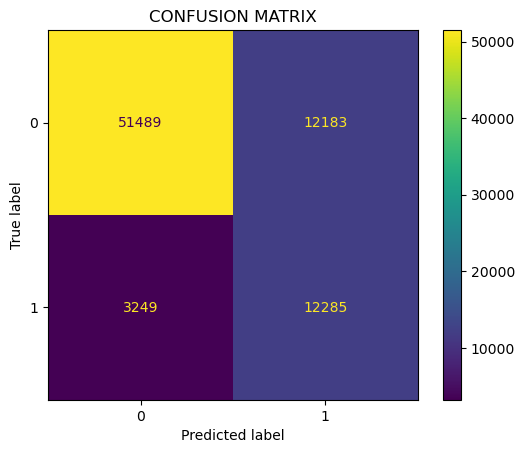

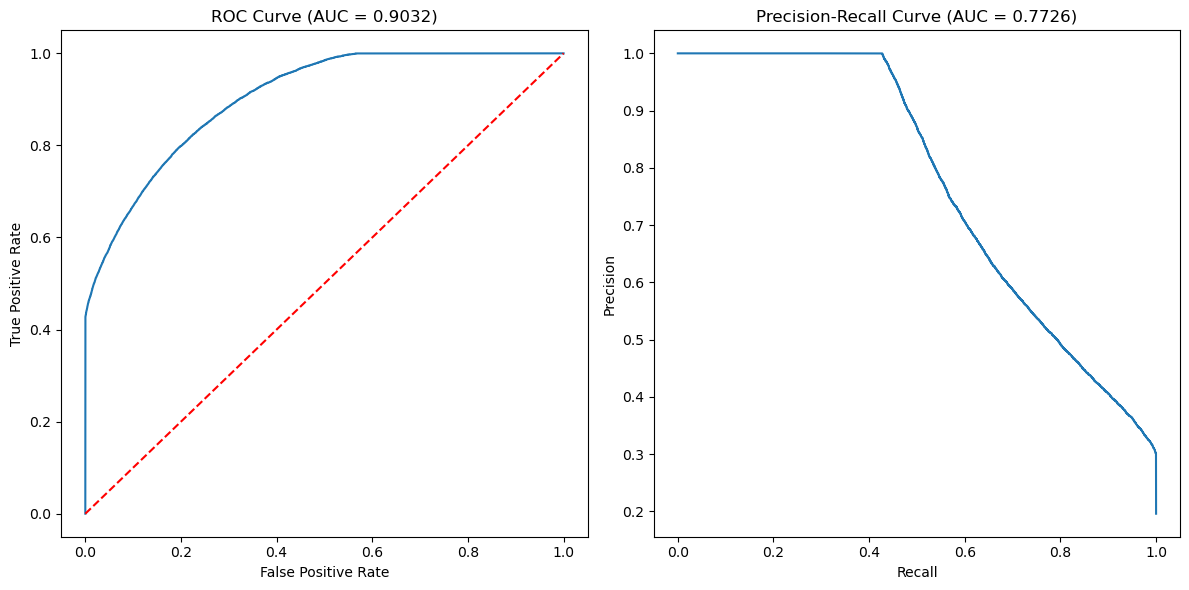

In [135]:
_,_,_,_,_,_,_ = evaluate(log_reg)

**Insights**:
* The baseline model shows similar accuracy score of **0.8** on both training and validation sets. This most probably means that the model is neither underfitted nor overfitted.
* F1 score of 0.8 for training vs 0.6 for validation means that the baseline model is less precise or less sensitive to defaulters than it was to non-defaulters. This is expected, since defaulters are the minority and hence harder to model.
* ROC AUC of 0.90 tells us that the baseline model is still very good at ranking defaulters vs non-defaulters.
* PR AUC of 0.77 is not that significant, but this is expected since base rate of defaulters is lower, so precision-recall tradeoffs are harsher.

### 3.2 Hyperparameter Tuning

Now let us us GridSearchCV to optimize the hyperparameters of the baseline model.

In [115]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['elasticnet'],
    'l1_ratio': [0, 0.5, 1],
    'solver': ['saga'],
    'max_iter': [10000],
    'tol': [1e-3]
}


grid = GridSearchCV(
    LogisticRegression(
        n_jobs=-1,
        random_state=42, 
        verbose=1
    ),
    param_grid=param_grid,
    cv=StratifiedKFold(shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1,
    verbose=4
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 262 epochs took 131 seconds


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(n_jobs=-1, random_state=42,
                                          verbose=1),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.5, 1],
                         'max_iter': [10000], 'penalty': ['elasticnet'],
                         'solver': ['saga'], 'tol': [0.001]},
             scoring='f1', verbose=4)

The best parameters are:

In [136]:
grid.best_params_

{'C': 10,
 'l1_ratio': 1,
 'max_iter': 10000,
 'penalty': 'elasticnet',
 'solver': 'saga',
 'tol': 0.001}

In [137]:
best_model = grid.best_estimator_

ACCURACY
Training = 0.8079
Validation = 0.8052
----------------------------------------------------------------
F1 SCORE
Training = 0.8080
Validation = 0.6143
----------------------------------------------------------------
CLASSIFICATION REPORT FOR VALIDATION SET
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     63672
           1       0.50      0.79      0.61     15534

    accuracy                           0.81     79206
   macro avg       0.72      0.80      0.74     79206
weighted avg       0.85      0.81      0.82     79206

----------------------------------------------------------------


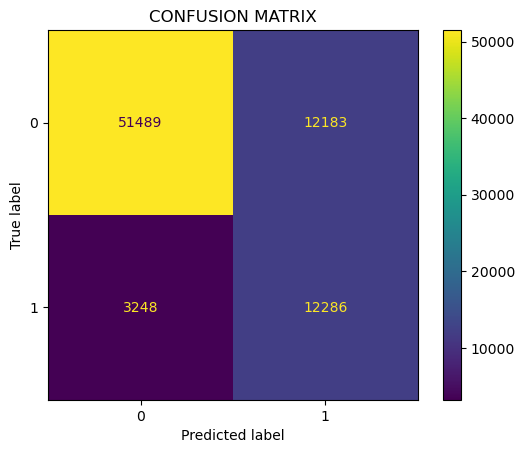

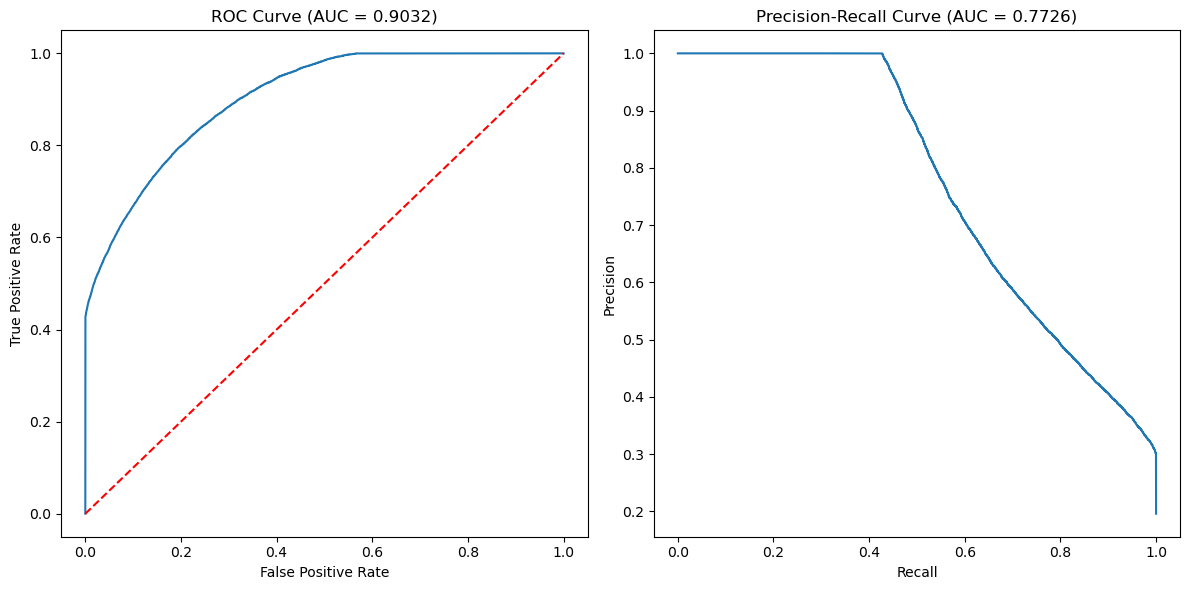

In [143]:
_,_,_, y_val_prob, precision, recall, thresholds = evaluate(best_model)

**Insights**:
* We can see that even after hyperparameter tuning, the model shows the same results, possibly denoting convergence at the baseline model itself.
* The goal is to maximize the recall of defaulters (i.e., correctly identify as many defaulters as possible) while maintaining a high precision to avoid incorrectly rejecting creditworthy applicants.
* Let us see if we can achieve this using threshold tuning, since the baseline model uses 0.5 as a threshold by default.

### 3.3 Tuning the Threshold value

In [144]:
f1_scores = [f1_score(y_val, y_val_prob >= t) for t in thresholds]
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

In [146]:
optimal_threshold

0.6654815470641494

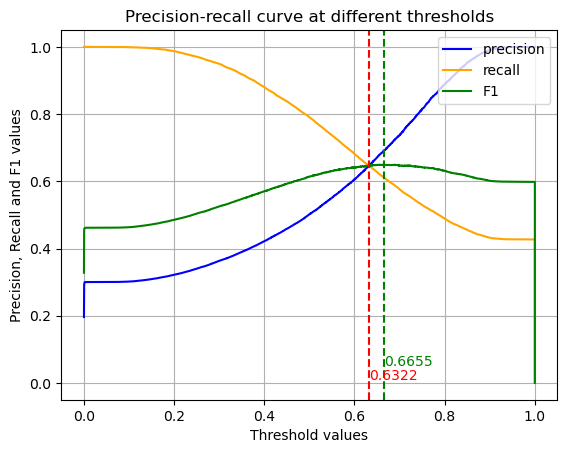

In [173]:
plt.figure()
plt.plot(thresholds,precision[0:len(thresholds)],label='precision',color='blue')
plt.plot(thresholds,recall[0:len(thresholds)],label='recall',color='orange')
plt.plot(thresholds, f1_scores[0:len(thresholds)], label='F1', color='green')

intersection_thr = thresholds[np.where(precision == recall)[0][0]].round(4)

plt.axvline(intersection_thr, linestyle='--', color='red')
plt.axvline(optimal_threshold, linestyle='--', color='green')

plt.text(intersection_thr, 0.01, str(intersection_thr), ha='left', color='red')
plt.text(optimal_threshold, 0.05, f'{optimal_threshold:.4f}', color='green')

plt.title("Precision-recall curve at different thresholds")
plt.xlabel("Threshold values")
plt.ylabel("Precision, Recall and F1 values")
plt.legend(loc="upper right")
plt.grid()
plt.show()

**Insights**:
* A threshold of **0.63** gives us equal values of precision and recall.
* However, our primary goal is to correctly identify as many defaulters (TP) as possible which translates to minimizing Falsely predicted non-defaulters (FN) i.e. **minimizing FN and hence maximizing recall**. This is critical, since falsely predicting defaulters as non-defaulters can incur heavy financial losses for the company. 
* The secondary objectve is still important i.e. to correctly identify potential credible borrowers but even if we miss out on that, the company doesn't incur a "loss" in traditional sense.
* Thus, **both recall and precision should be high, with recall > precision AND maximum F1 score**.
* We can see this being achieved at a threshold of **0.6655**, with recall being slightly higher than precision. 

Let us check the model performance with revised threshold.

In [155]:
y_val_opt = (y_val_prob >= optimal_threshold).astype(int)
print(classification_report(y_val, y_val_opt))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     63672
           1       0.69      0.61      0.65     15534

    accuracy                           0.87     79206
   macro avg       0.80      0.77      0.78     79206
weighted avg       0.87      0.87      0.87     79206



**Insights for Positive class (1)**:
* Accuracy increases significantly from 0.81 to 0.87. Model is now correct more often overall, likely due to predicting more majority class (non-defaulters) correctly.
* Precision increases from 0.5 to 0.69.
* Recall drops from 0.79 to 0.61.
* F1 score improves from 0.61 to 0.65.

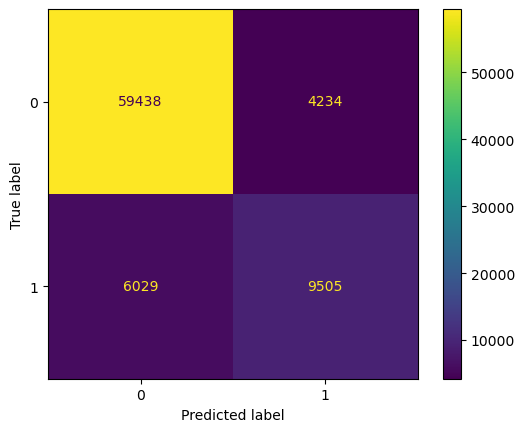

In [156]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_val_opt)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

After threshold tuning, the model has become more conservative in predicting defaults i.e. reducing false positives and improving overall accuracy and precision, but at the cost of missing more actual defaulters. This trade-off should be aligned with the business's risk appetite and loss tolerance.

### 3.3 Model Coefficients

In [165]:
# Create dataframe of feature names and their coefficients
feature_imp = pd.DataFrame({
    'Columns': X_train.columns,
    'Coefficients': best_model.coef_[0]
})

Let us now explore model coefficients.

C:\Users\Dell\AppData\Local\Temp\ipykernel_11768\4220391493.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_imp.sort_values(by='Coefficients'), y = 'Columns', x = 'Coefficients', palette='coolwarm')


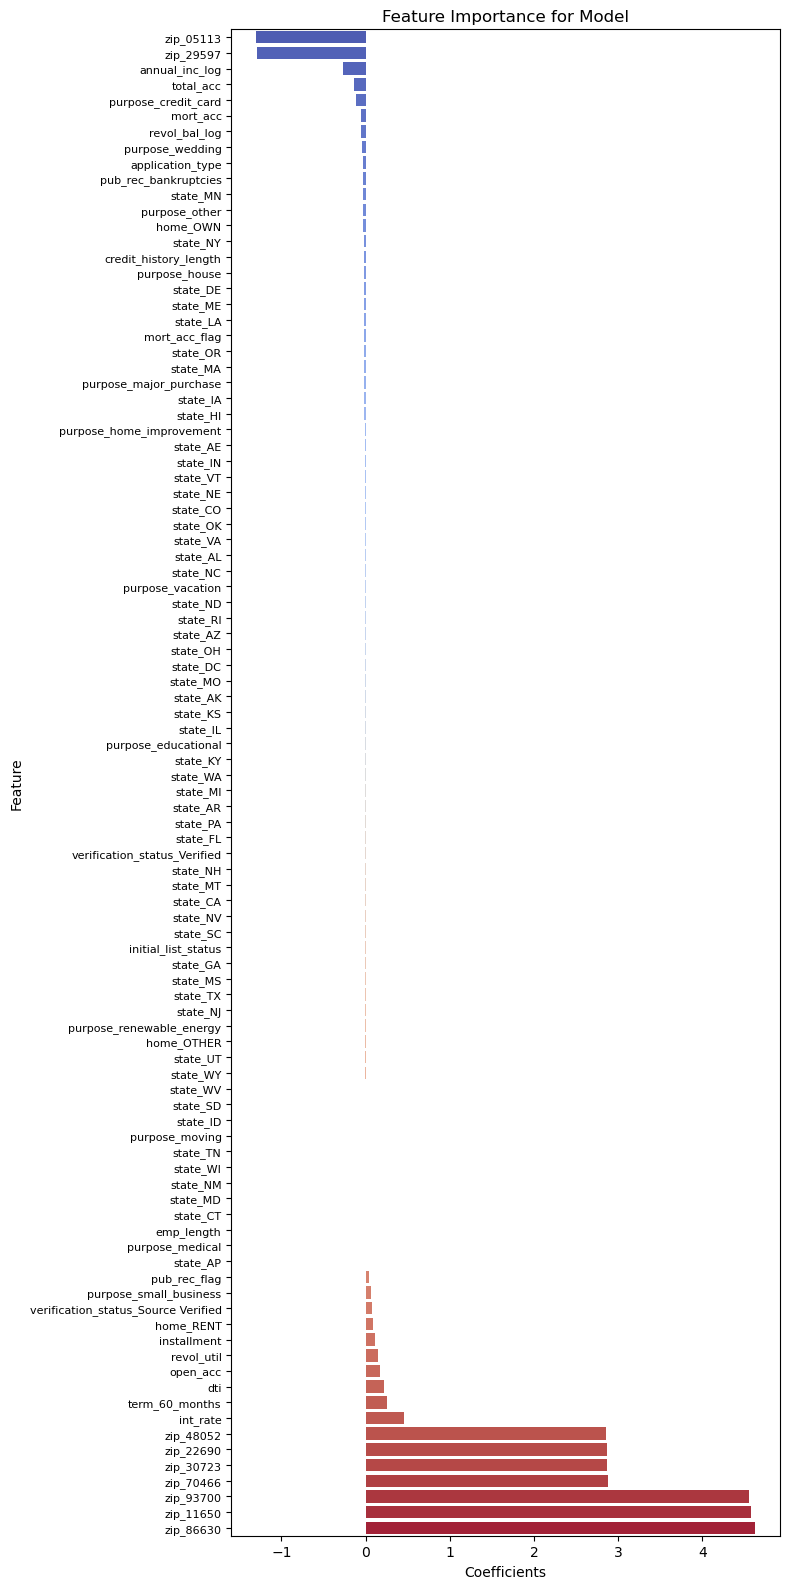

In [253]:
plt.figure(figsize=(8,16))
sns.barplot(data=feature_imp.sort_values(by='Coefficients'), y = 'Columns', x = 'Coefficients', palette='coolwarm')
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**Insights**:
* The coefficients for ZIP code related one-hot features are the highest of all the coefficients, denoting that the model is heavily influenced by geographical location.
* Since the defaulters come from regions with zip codes **93700, 86630, 11650, 22690, 30723, 48052 and 70466**; the one-hot encoded features of these ZIP codes increase the likelihood of the outcome being 1 (defaulter) and hence are higher. Furthermore, since all the borrowers from ZIP codes 93700, 86630 and 11650 are defaulters, their coefficients are significantly higher. On the other side, ZIP codes 05113 and 29597 do not witness any defaulters, their influence is minimal and hence, negative coefficients. 
* High values of features such as **int_rate, term_60_months, dti, open_acc and revol_util** also increase the likelihood of borrower being a defaulter.

## 4. Summary

1. Approximately **80.4%** of customers in the dataset have **fully repaid** their loan amounts. This indicates that the majority of LoanTap’s lending portfolio comprises successful repayments, though the remaining **19.6% default rate** is still significant for risk assessment.
2. There exists a **very strong positive correlation (r = 0.95) between the loan amount and the installment amount**. This implies that as loan amounts increase, the corresponding monthly installments also rise proportionally, which aligns with standard loan structuring.
3. Most borrowers in the dataset report their **home ownership** status as **Mortgage**. This suggests a relatively stable asset base, though it also indicates ongoing debt commitments which must be factored into credit risk.
4. Borrowers with **Grade A** are **statistically more likely to repay their loans in full** compared to lower-grade borrowers. This statement is true and supported by observed repayment behavior and interest rate trends across grade levels.
5. The most frequently reported job titles among borrowers are **Teacher and Manager**. These roles typically indicate stable income sources, which may contribute to higher approval likelihood and repayment ability.
6. From a bank’s perspective, the primary metric to focus on is **recall**. Maximizing recall ensures that most actual defaulters are correctly identified, minimizing false negatives which could lead to unrecoverable losses.
7. A gap between precision and recall has a direct impact on business outcomes. **Low precision means rejecting many good borrowers unnecessarily, while low recall means missing actual defaulters, leading to financial risk**. Maintaining a balance is critical.
8. Key features influencing default outcomes include **zip codes 93700, 86630, 11650, 22690, 30723, 48052 and 70466**; as well as features like **int_rate, term_60_months, dti, open_acc and revol_uti**.
9. Results are heavily affected by geographical location. Different ZIP codes exhibit varying levels of default risk due to economic, regulatory, or demographic factors. Geographic variables, if retained, should be monitored for localized risk segmentation.